In [2]:
## import required modules
import pandas as pd
import seaborn as sns
from dateutil.parser import parse
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

%matplotlib inline

c:\python27\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
## read the google data
df = pd.read_csv('alphonso-google-1499098100.csv')

In [4]:
## check for missing values
pd.isnull(df).sum() > 0

## looks like Tags and Co-Op Brand have some missing values

Id                   False
Title                False
Brand                False
Category             False
Network              False
Show                 False
Date                 False
Time                 False
Pod Position         False
Dayparts             False
Tags                  True
Co-Op Brand           True
Product              False
Duration             False
EQ Units             False
Broadcast Year       False
Broadcast Quarter    False
Broadcast Month      False
Broadcast Week       False
dtype: bool

In [57]:
## remove missing values
df.dropna(inplace = True)
print df.shape

(569, 20)


In [40]:
## create hour and day of the week columns
df['hour'] = df['Time'].apply(lambda x: parse(x).hour)
df['Day'] = df['Time'].apply(lambda x: parse(x).isoweekday())

In [41]:
## lets take a look at the top 3 rows
df.head(3)

,Id,Title,Brand,Category,Network,Show,Date,Time,Pod Position,Dayparts,Tags,Co-Op Brand,Product,Duration,EQ Units,Broadcast Year,Broadcast Quarter,Broadcast Month,Broadcast Week,hour
0,3241204,"Google Home ""Hands-Free Calling"" TV Commercial",Google,Electronics & Communication,TBS,Married ... With Children,7/3/2017,5:13:43 AM,12,EARLY MORNING,Cable,NaN,Google Home,30,1.0,2017,Q3,Jul,28,2
1,3241405,"Google Home ""New Features Coming To Google Hom...",Google,Electronics & Communication,MTV Hits,Videos We Heart,7/3/2017,5:07:30 AM,1,EARLY MORNING,Cable,NaN,Google Home,90,3.0,2017,Q3,Jul,28,2
2,3241204,"Google Home ""Hands-Free Calling"" TV Commercial",Google,Electronics & Communication,nick@nite,George Lopez,7/3/2017,4:24:32 AM,11,OVER NIGHT,Cable,NaN,Google Home,30,1.0,2017,Q3,Jul,28,2


In [4]:
## lets take a look at the columns
df.columns

Index([u'Id', u'Title', u'Brand', u'Category', u'Network', u'Show', u'Date',
       u'Time', u'Pod Position', u'Dayparts', u'Tags', u'Co-Op Brand',
       u'Product', u'Duration', u'EQ Units', u'Broadcast Year',
       u'Broadcast Quarter', u'Broadcast Month', u'Broadcast Week'],
      dtype='object')

In [6]:
## lets take a look at the size of the dataset
df.shape

(1710, 19)

In [45]:
## let's take the unique values in each of the columns
for i in df.columns:
    print 'column', i, 'has', len(df[i].unique()), 'unique values'
    if len(df[i].unique()) < 50:
        print 'the values are', df[i].unique()
        print '\n*********************************************'

column Id has 23 unique values
the values are [3241204 3241405 3229260 3229284 3220684 3222515 3223730 3241314 3241313
 3241208 3245591 3222057 3241206 3221118 3206482 3205741 3220426 3242332
 3241838 3216395 3230738 3221757 3216686]

*********************************************
column Title has 19 unique values
the values are ['Google Home "Hands-Free Calling" TV Commercial'
 'Google Home "New Features Coming To Google Home" - I/O 2017 TV Commercial'
 'Google Pixel "Tributes By You, Phone By Google" TV Commercial'
 'Google Pixel On Verizon "Tributes By You, Phone By Google" TV Commercial'
 'Google Home "Home By You. Help By Google." TV Commercial'
 'Google Pixel & VR On Verizon TV Commercial'
 'Google Photos "Photos. For Life." TV Commercial'
 'Google Home Hands-Free Calling "Call A Locksmith" TV Commercial'
 'Google Home Supports Multiple Users "Workout" TV Commercial'
 'Google Home Multiple User Support "Carpool" TV Commercial'
 'Google Home At Best Buy TV Commercial'
 'Google Home

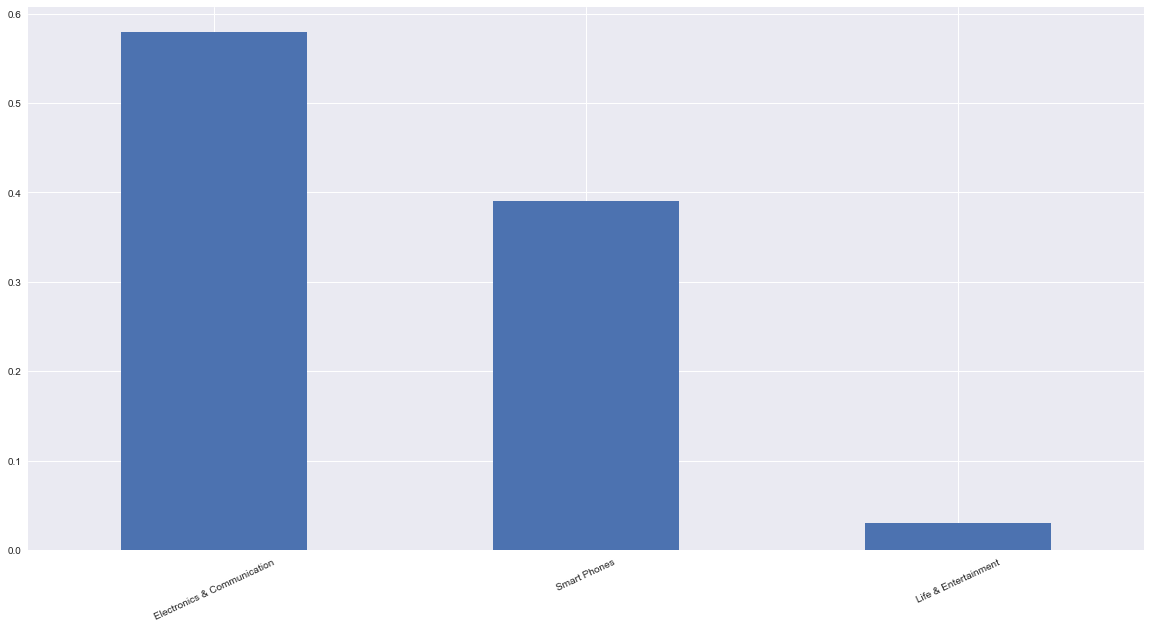

In [47]:
## plot frequency count for category
prob = df['Category'].value_counts(normalize=True)
plt.figure(figsize=(20,10))
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
if not tail_prob==0:
    prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

## observation
# only 3 categories
# Electronics & Communication is the majority

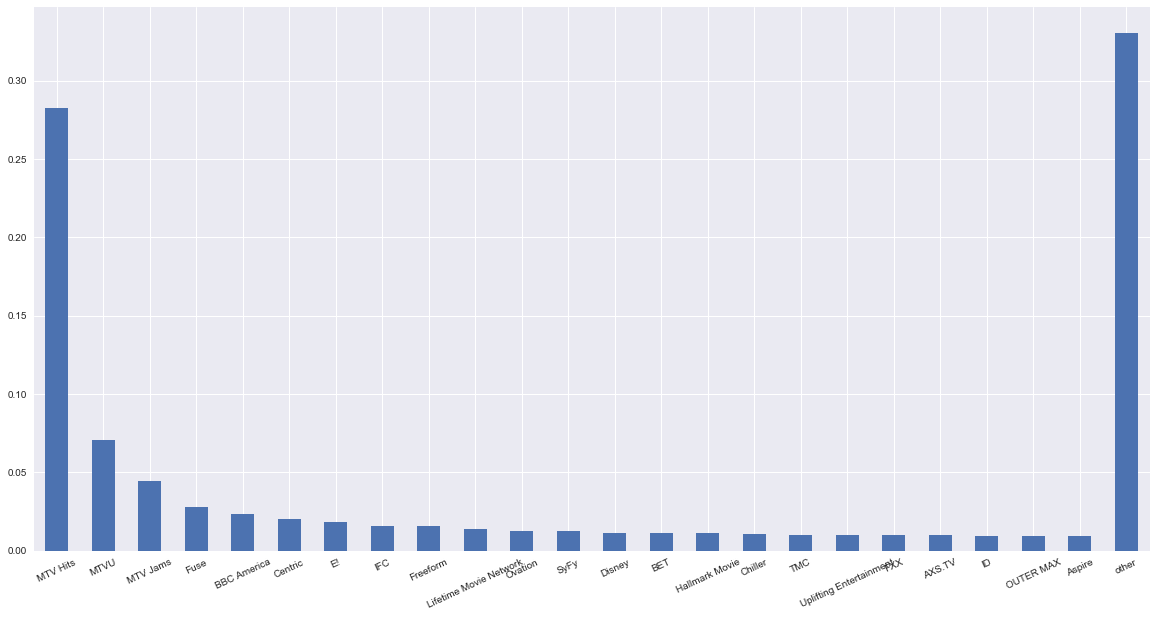

In [48]:
## plot frequency count for Network
prob = df['Network'].value_counts(normalize=True)
plt.figure(figsize=(20,10))
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
if not tail_prob==0:
    prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

# Observation
# MTV Hits is major network, comprising of nearly 30%
# Other MTV brands ~ 45%
# there are many others networks

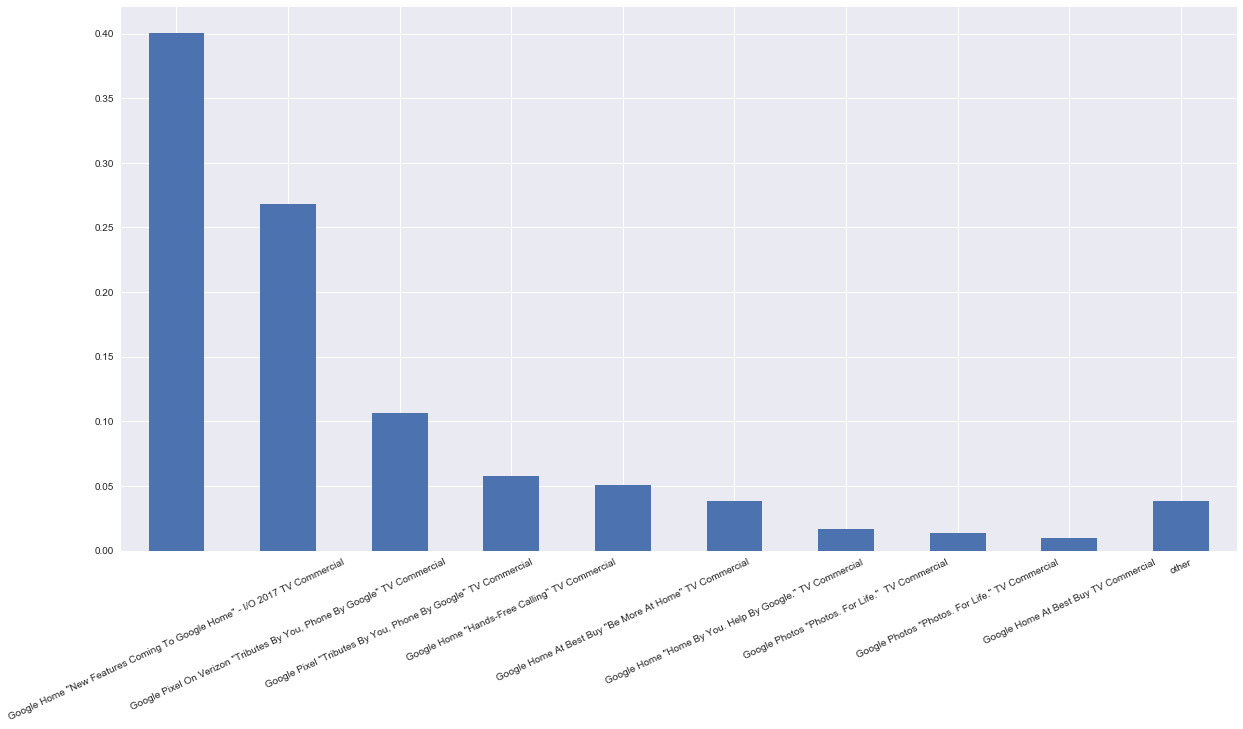

In [40]:
## plot frequency count for Title
prob = df['Title'].value_counts(normalize=True)
plt.figure(figsize=(20,10))
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

## Observation
# Most frequent is Google "New Features Coming to Google Home" - I/O 2017 TV Commercial and is around 40%
# Next is Google Pixel on Verizon "Tributes By You. Phone By Goole" TV Commercial

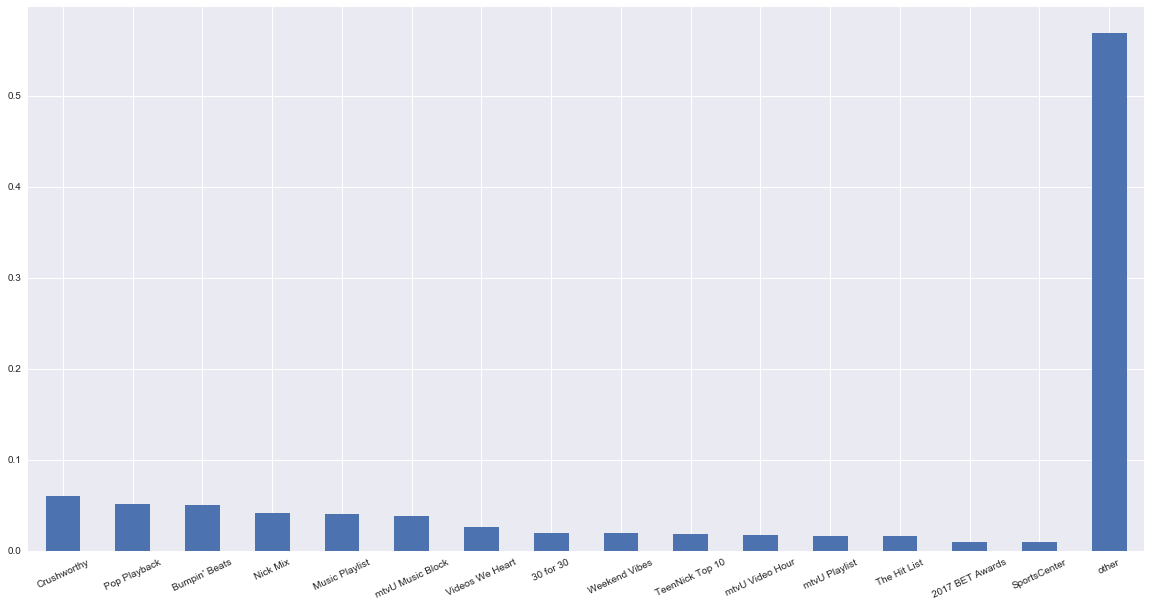

In [49]:
## plot frequency count for Show
prob = df['Show'].value_counts(normalize=True)
plt.figure(figsize=(20,10))
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
if not tail_prob==0:
    prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

# Observations
# Not one major Show. Distributed across all

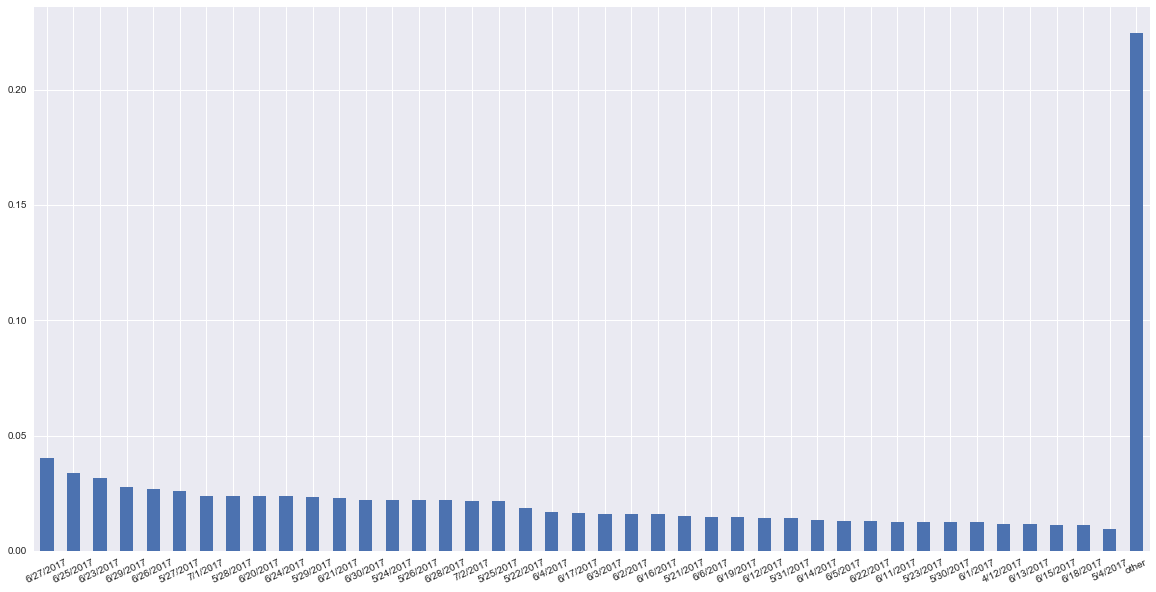

In [42]:
## plot frequency count for Date
prob = df['Date'].value_counts(normalize=True)
plt.figure(figsize=(20,10))
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
if not tail_prob==0:
    prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

## Observations
# Maximum one day TV commercials on 6/27/2017 but not a major portion. Distribution is almost even across dates

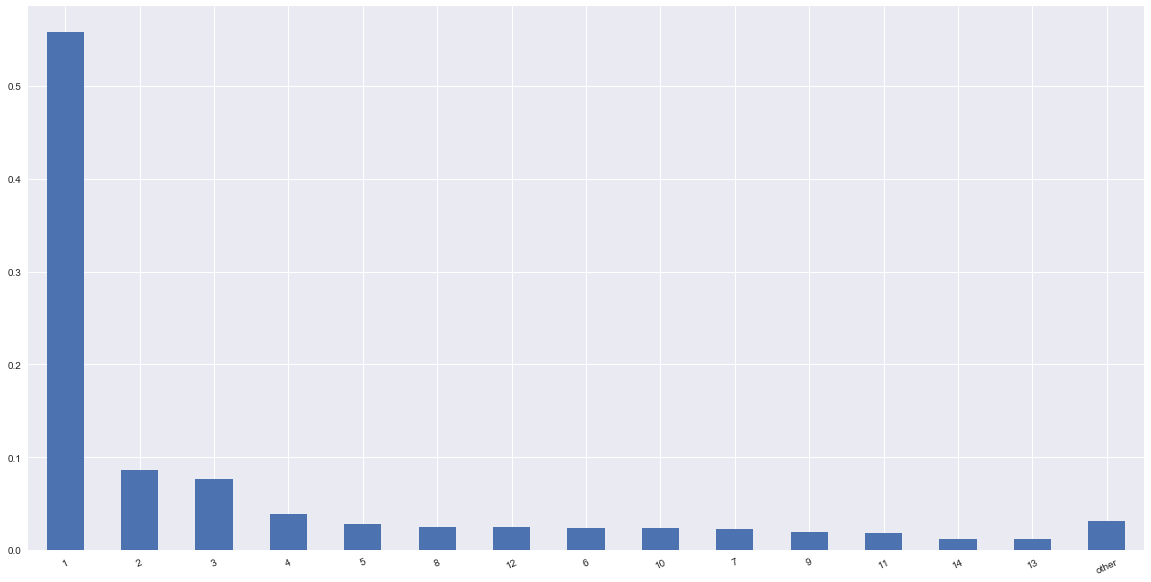

In [54]:
## plot frequency count for Pod Position
prob = df['Pod Position'].value_counts(normalize=True)
plt.figure(figsize=(20,10))
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
if not tail_prob==0:
    prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

# Observations
# Pod position is the most common and comprises around 60%

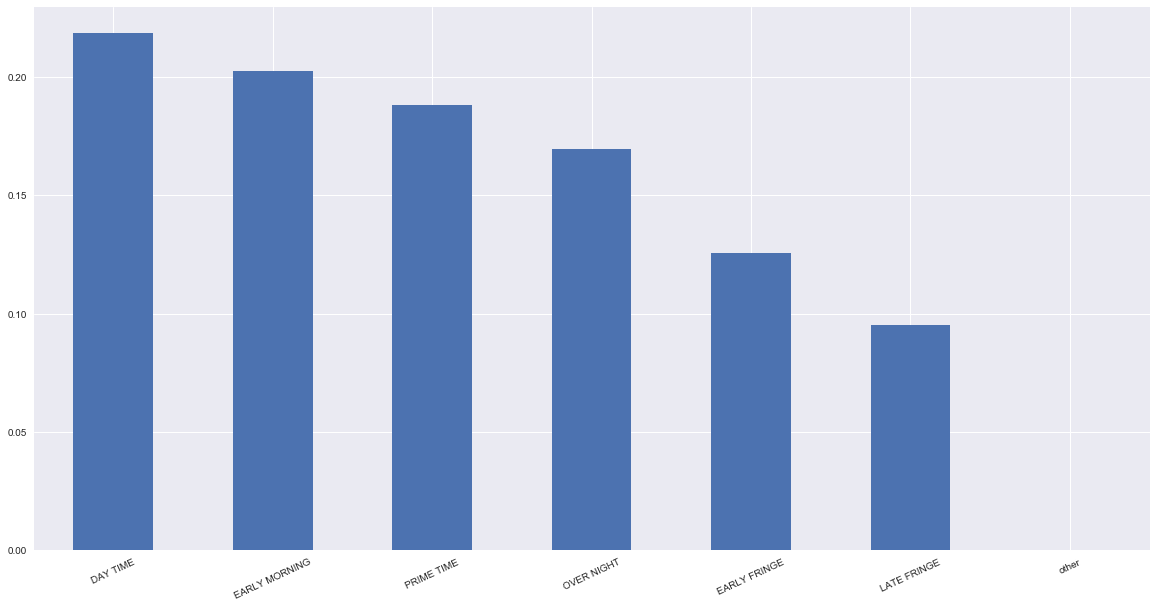

In [45]:
## plot frequency count for Dayparts
prob = df['Dayparts'].value_counts(normalize=True)
plt.figure(figsize=(20,10))
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
if not tail_prob==0:
    prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

# observations
# maximum number of TV commercials is Day time followed by morning time and prime time

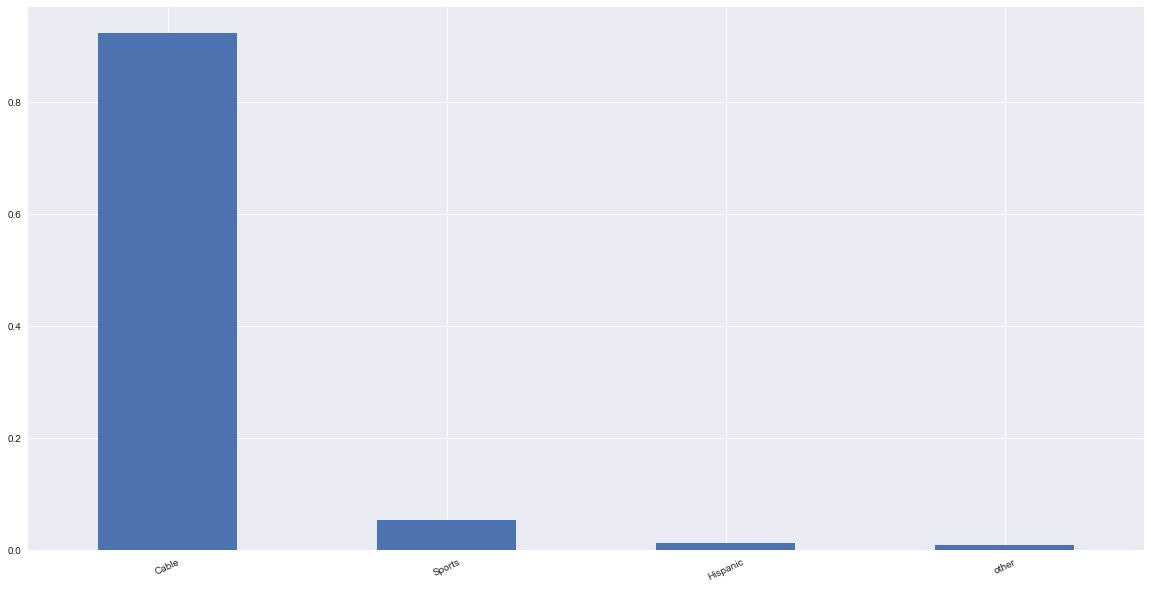

In [46]:
## plot frequency count for Tags
prob = df['Tags'].value_counts(normalize=True)
plt.figure(figsize=(20,10))
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
if not tail_prob==0:
    prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

# Observations
# Max is on Cable

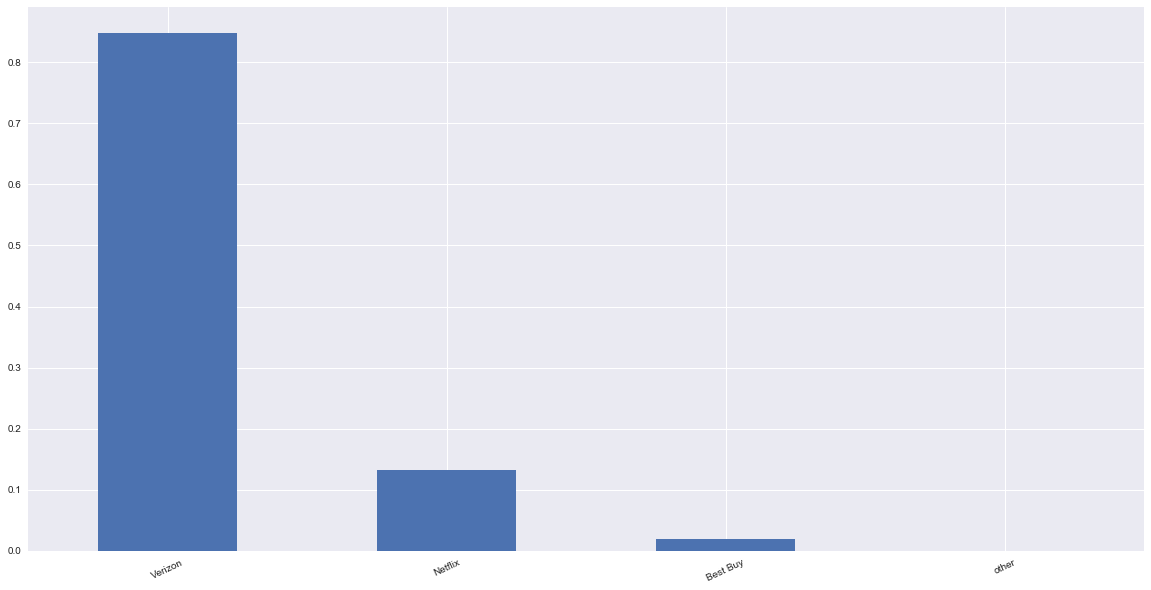

In [47]:
## plot frequency count for Title
prob = df['Co-Op Brand'].value_counts(normalize=True)
plt.figure(figsize=(20,10))
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
if not tail_prob==0:
    prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

# Observations
# Max commercials on Verizon followed by Netflix

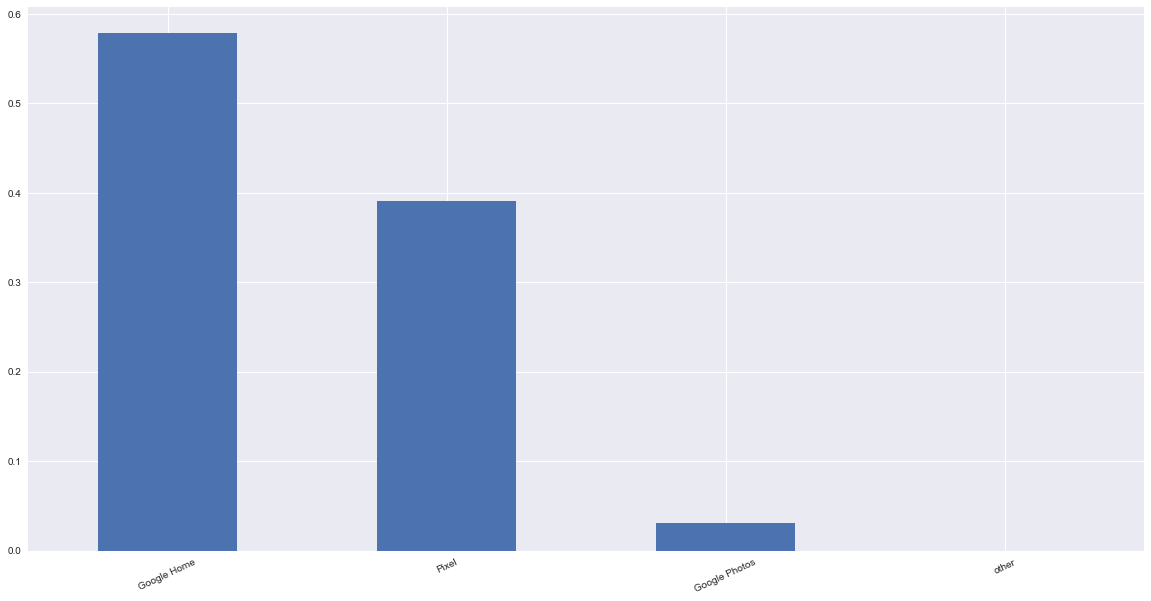

In [48]:
## plot frequency count for Product
prob = df['Product'].value_counts(normalize=True)
plt.figure(figsize=(20,10))
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
if not tail_prob==0:
    prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

# observations
# The most promoted product is Google Home followed by Pixel

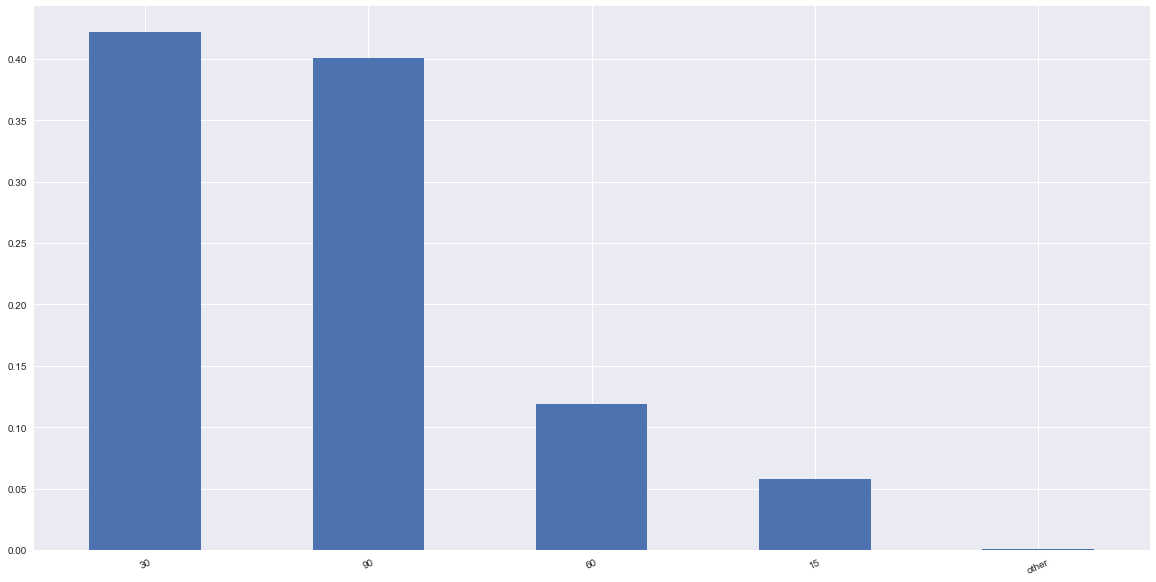

In [50]:
## plot frequency count for Duration
prob = df['Duration'].value_counts(normalize=True)
plt.figure(figsize=(20,10))
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
if not tail_prob==0:
    prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

# Observations
# maximum commercials (~80%) were of 30 and 90 seconds duration

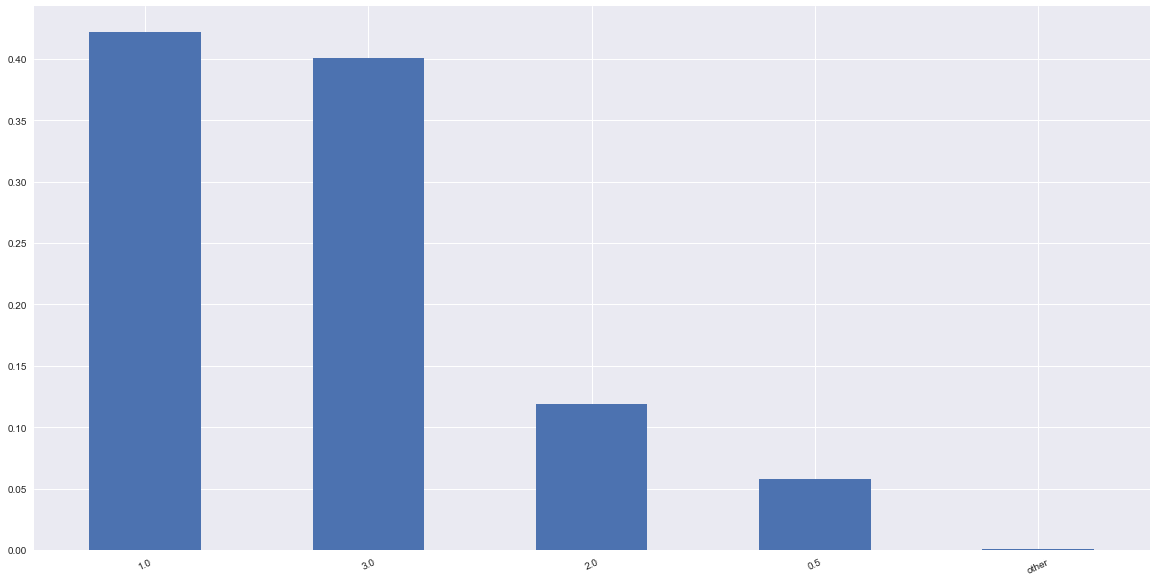

In [51]:
## plot frequency count for EQ Units
prob = df['EQ Units'].value_counts(normalize=True)
plt.figure(figsize=(20,10))
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
if not tail_prob==0:
    prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

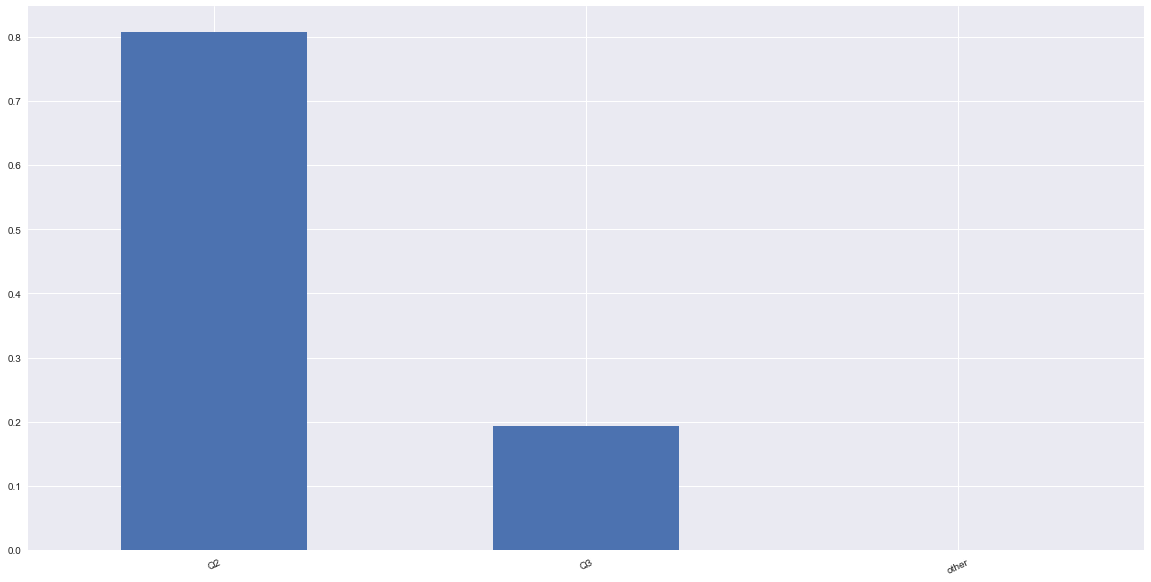

In [53]:
## plot frequency count for Broadcast Quarter
prob = df['Broadcast Quarter'].value_counts(normalize=True)
plt.figure(figsize=(20,10))
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
if not tail_prob==0:
    prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

# observations
# most commercials in Q2

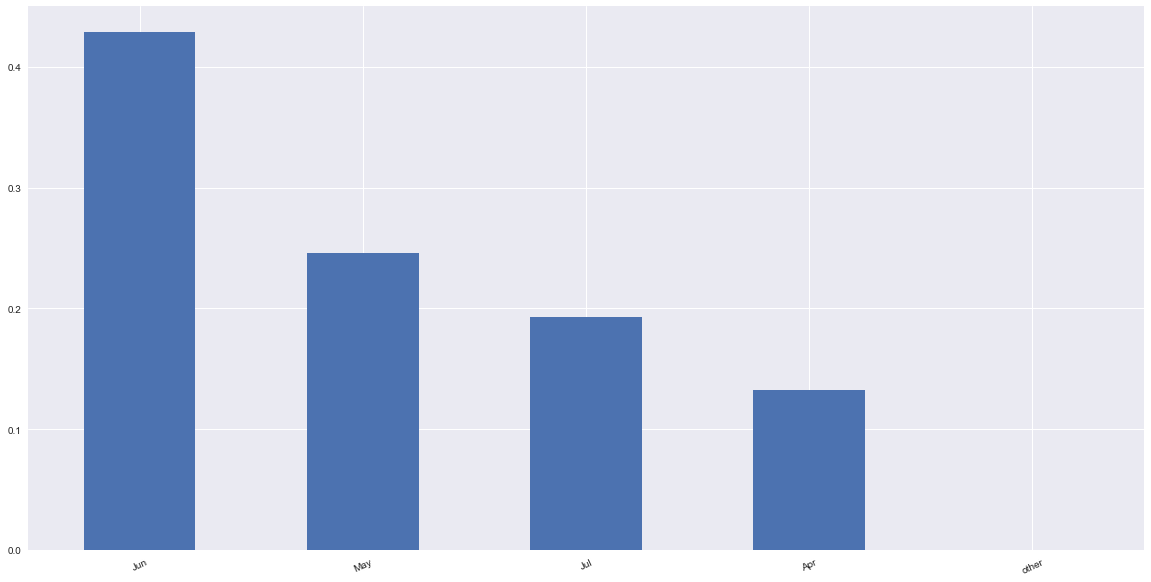

In [54]:
## plot frequency count for Broadcast Month
prob = df['Broadcast Month'].value_counts(normalize=True)
plt.figure(figsize=(20,10))
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
if not tail_prob==0:
    prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

# Observations
# most commercials in June followed by May

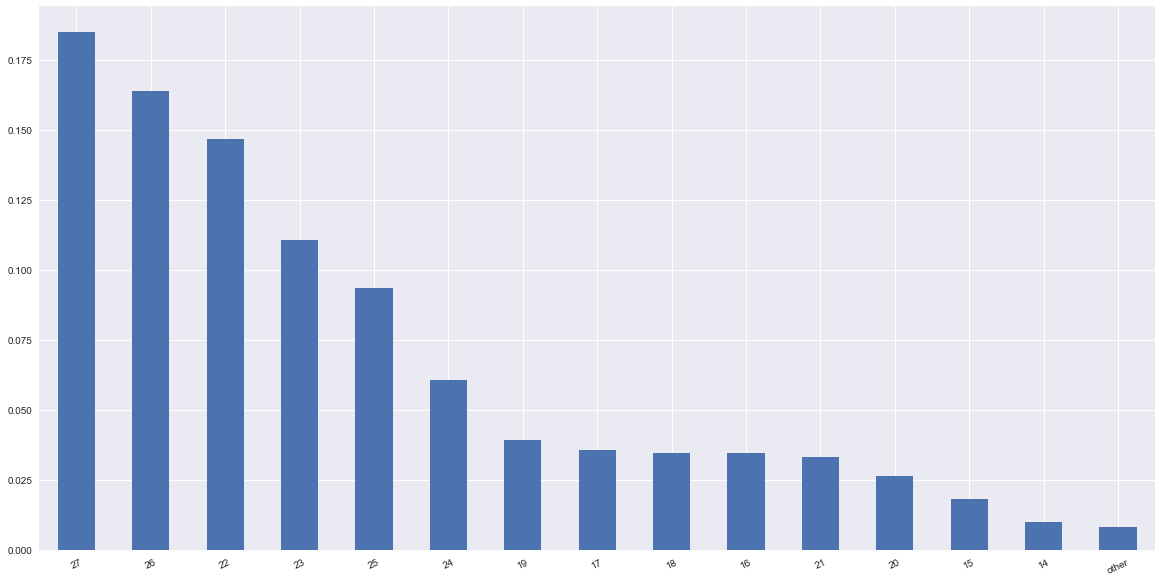

In [55]:
## plot frequency count for Broadcast Week
prob = df['Broadcast Week'].value_counts(normalize=True)
plt.figure(figsize=(20,10))
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
if not tail_prob==0:
    prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

# Observations
# Around 18% of commercials in 27th week. 16% in 26th week

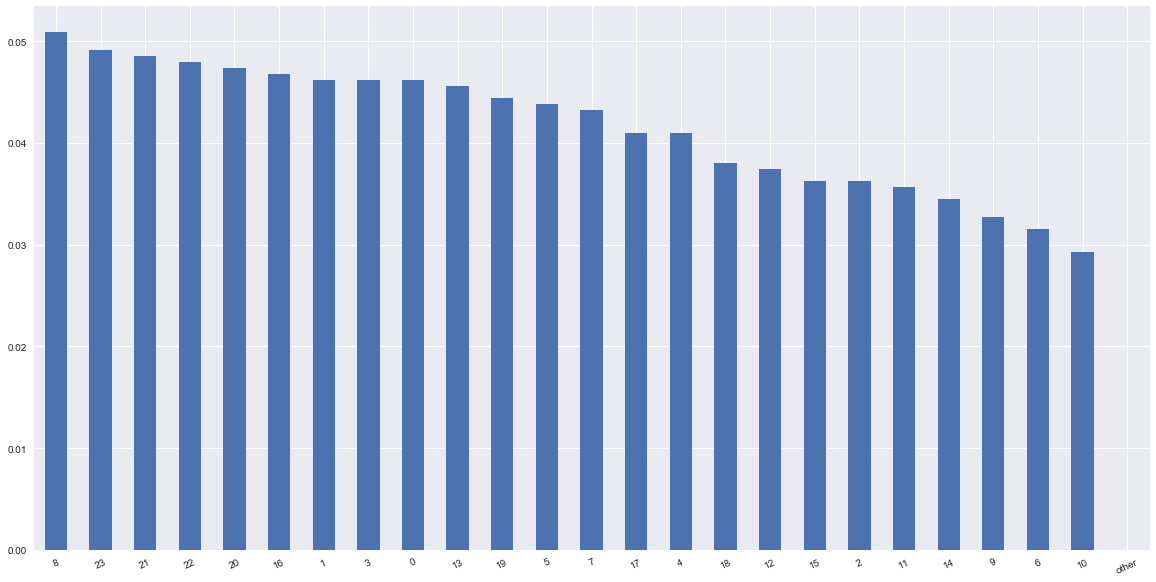

In [62]:
## plot frequency count for Broadcast hour
prob = df['hour'].value_counts(normalize=True)
plt.figure(figsize=(20,10))
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
if not tail_prob==0:
    prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

## Max commercials during 8 AM and then in night hours, prime time

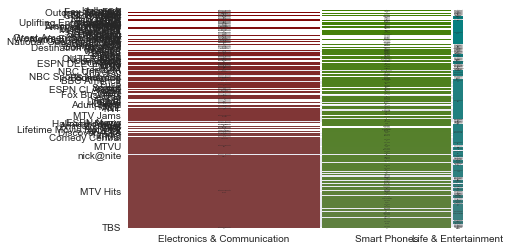

In [55]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 0.5
plt.figure(figsize=(200000,100000));
mosaic(df, ['Category', 'Network']);

## Observations
# Electronics & Communication on TBS was the best combo of all

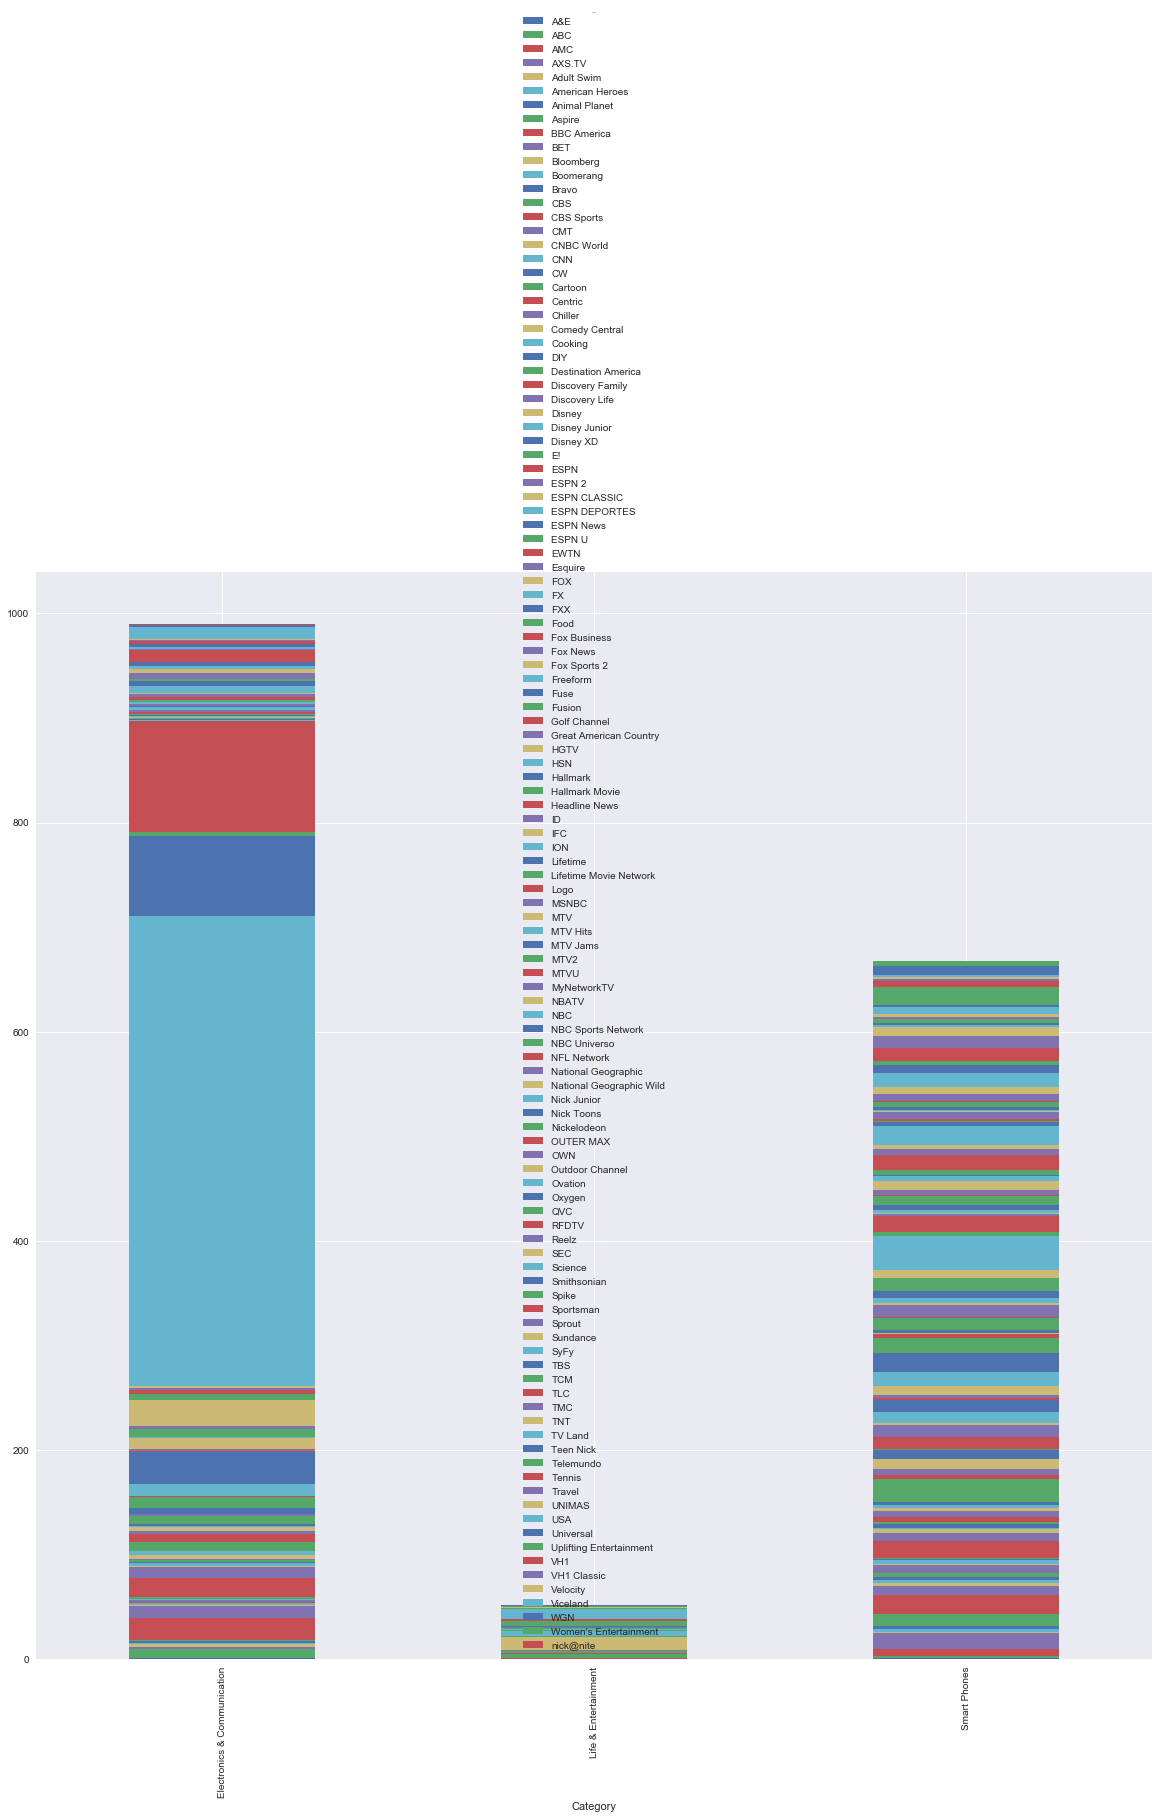

In [53]:
# cross tab of category and network
table1 = pd.crosstab(index=df["Category"], 
                          columns=df["Network"])

table1.plot(kind="bar", 
                 figsize=(20,20),
                 stacked=True)
# Observation
# same as above

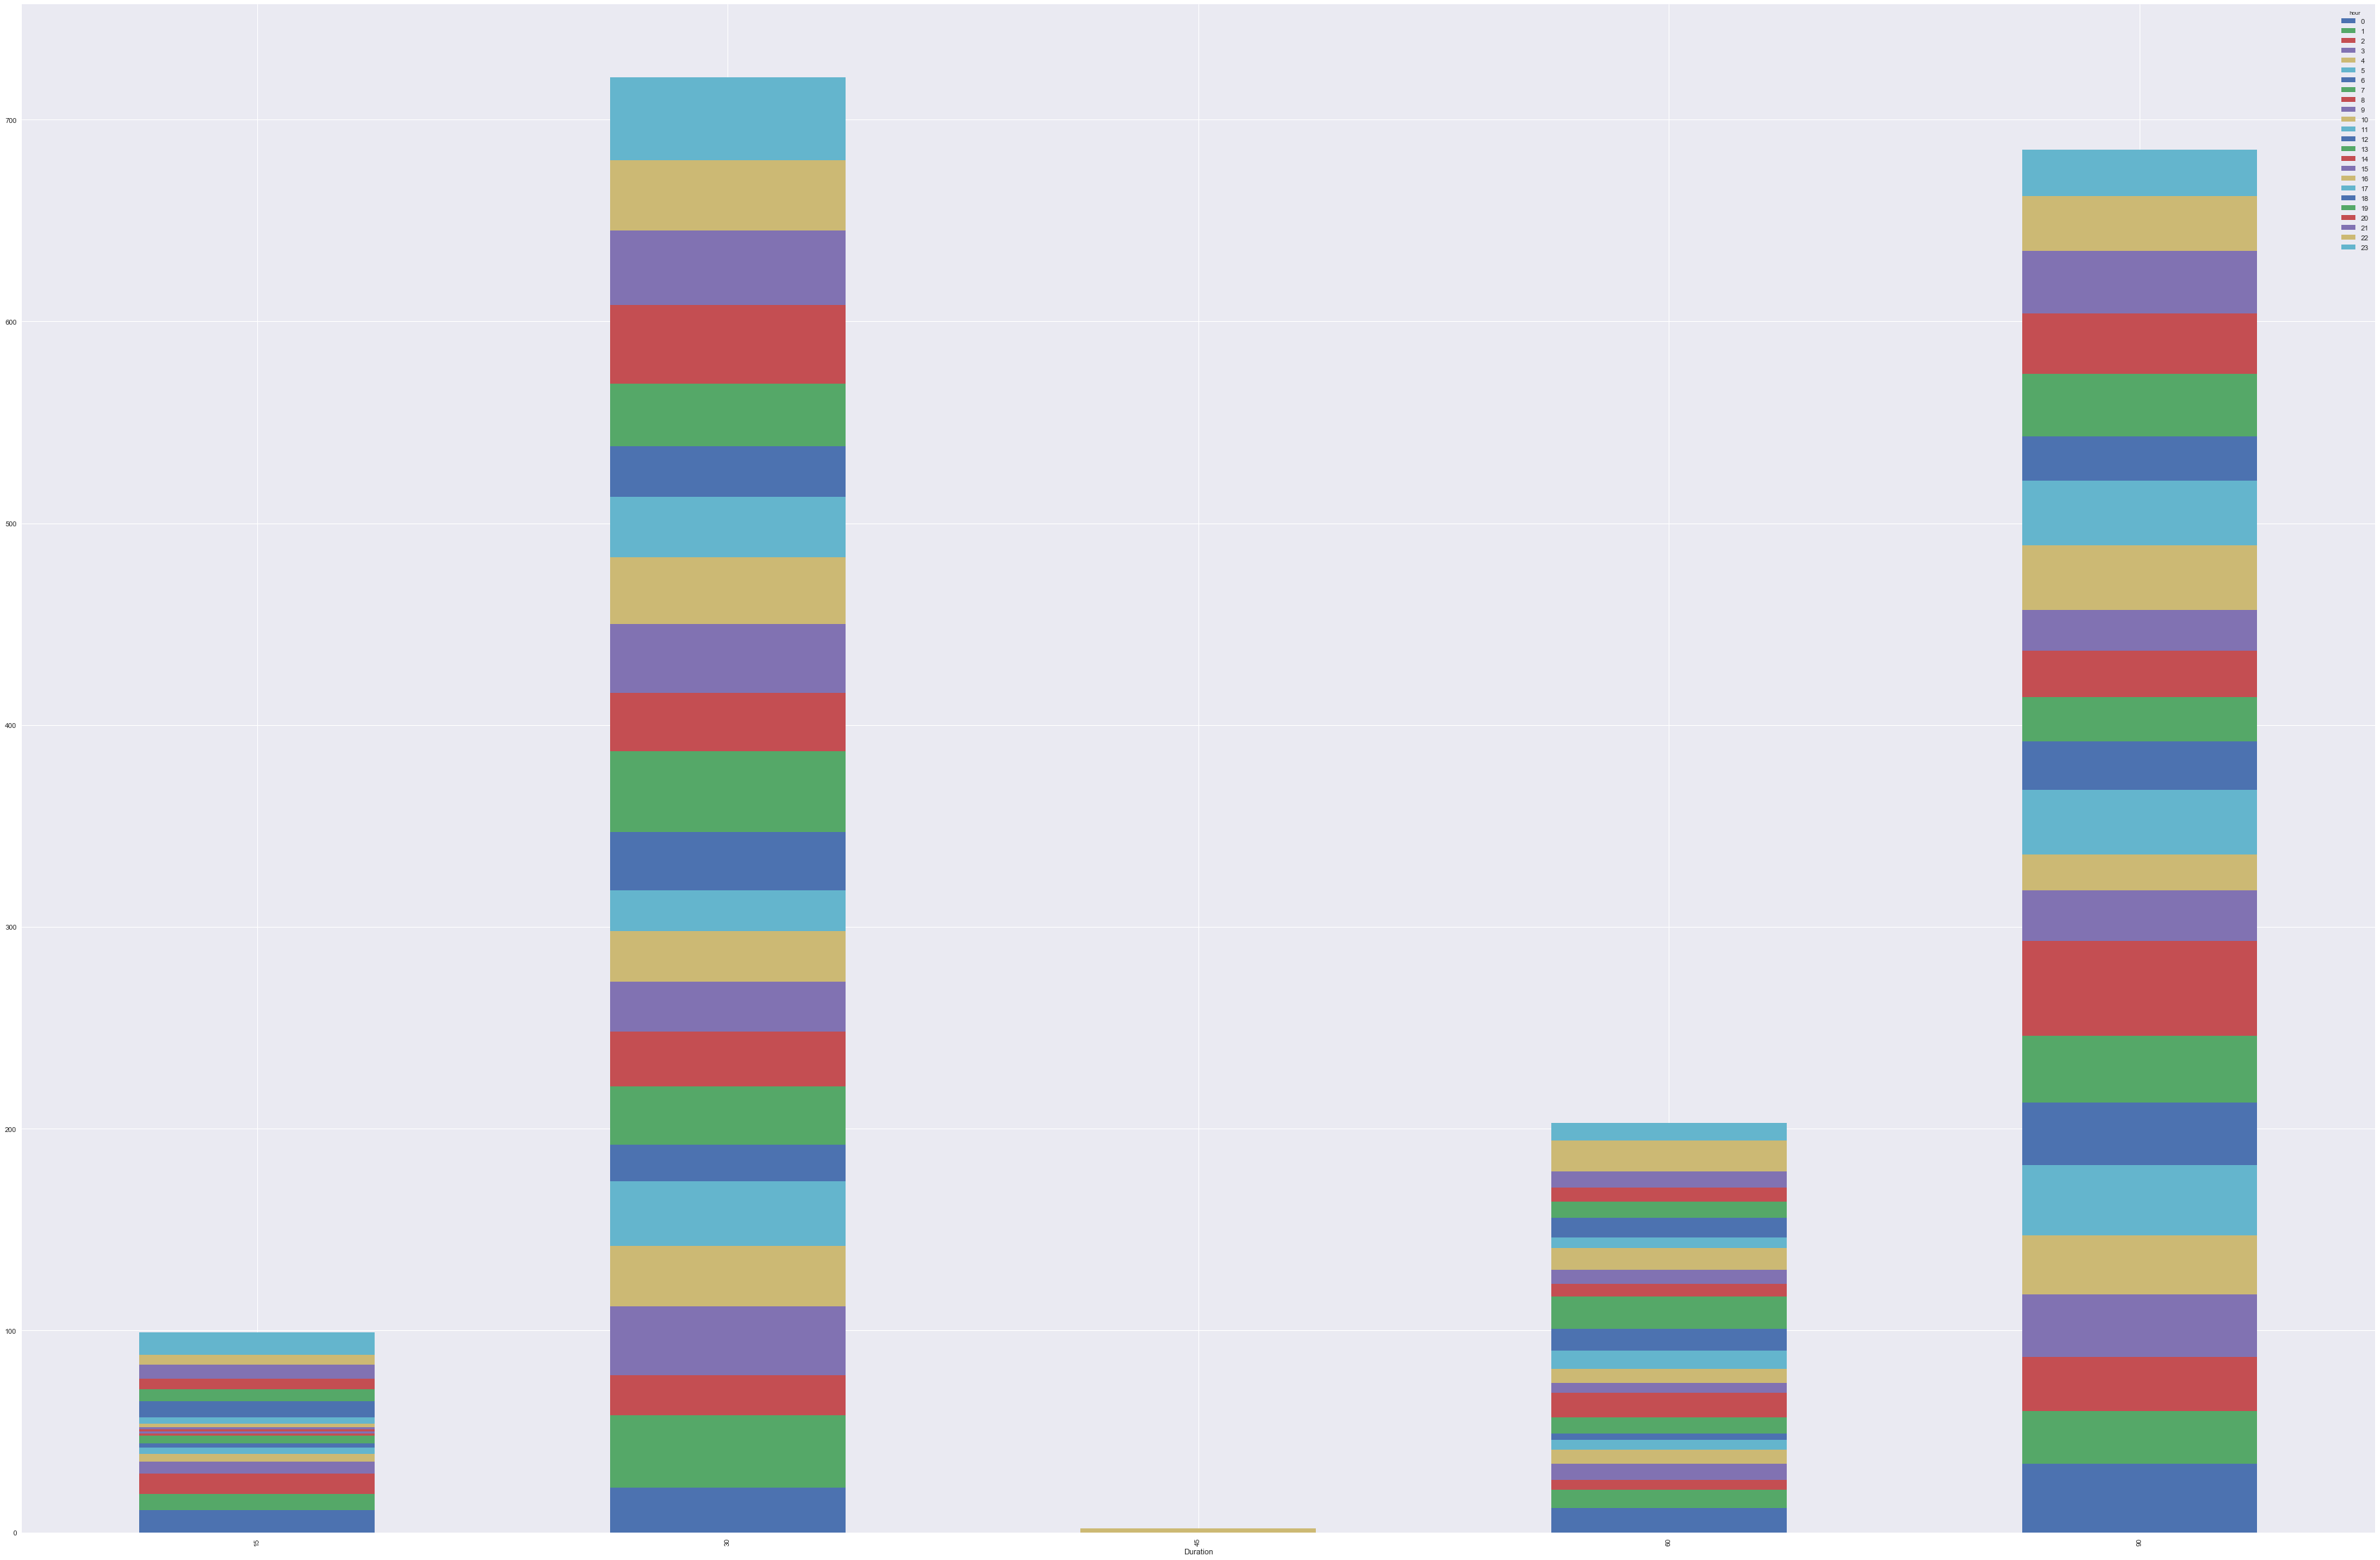

In [87]:
# cross tab of Duration and hour
table2 = pd.crosstab(index=df["Duration"], 
                          columns=df["hour"])

table2.plot(kind="bar", 
                 figsize=(60,40),
                 stacked=True)
# Observations
# Commercials are evenly distributed across hours for same durations. 30 and 90 secon durations are highest

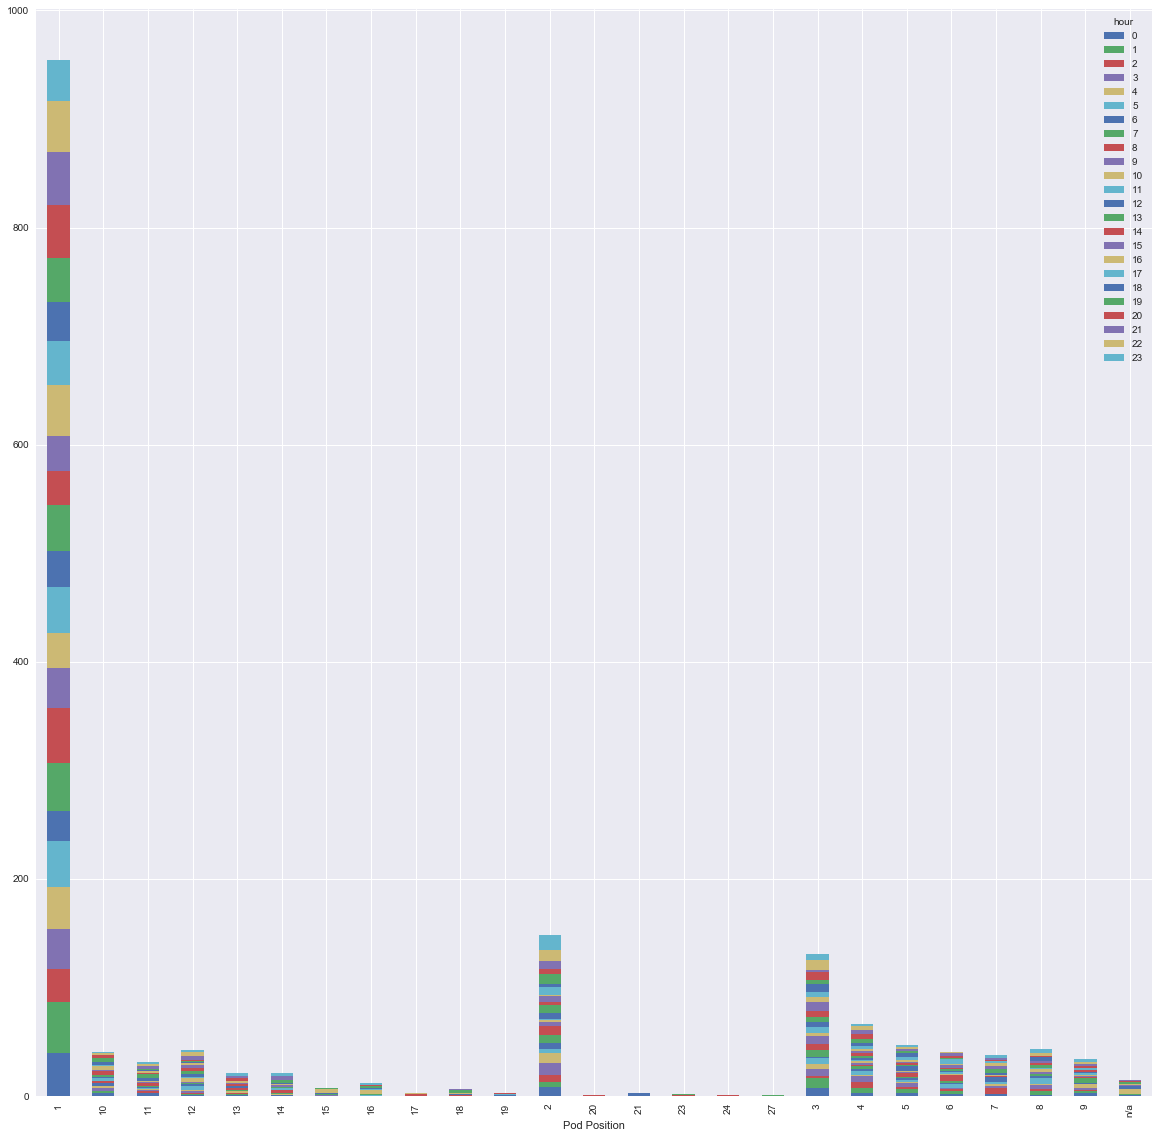

In [21]:
# cross tab of Pod Position and hour
table3 = pd.crosstab(index=df["Pod Position"], 
                          columns=df["hour"])

table3.plot(kind="bar", 
                 figsize=(20,20),
                 stacked=True)

# Observations
# Pod positions are distributed almost evenly across hours

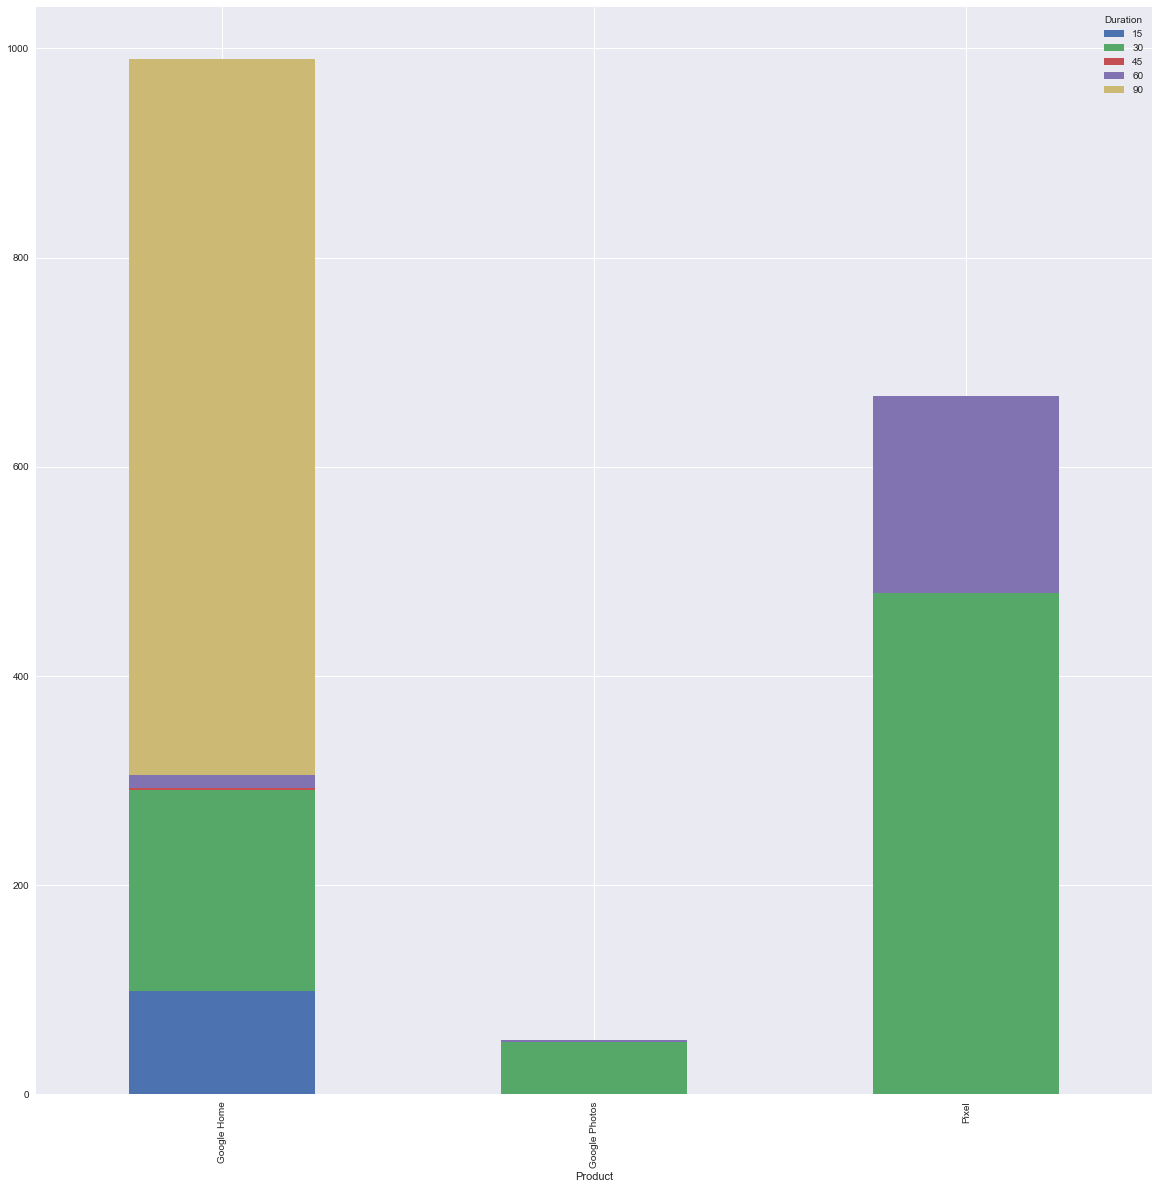

In [20]:
# cross tab of Product and Duration
table4 = pd.crosstab(index=df["Product"], 
                          columns=df["Duration"])

table4.plot(kind="bar", 
                 figsize=(20,20),
                 stacked=True)

# Observations
# For Google Home, the maximum % of commercials were 90 seconds
# For Google Photos, the maximum % of commercials were 30 seconds
# for Google Pixel, the maximum % of commercials were 30 seconds followed by 15 seconds

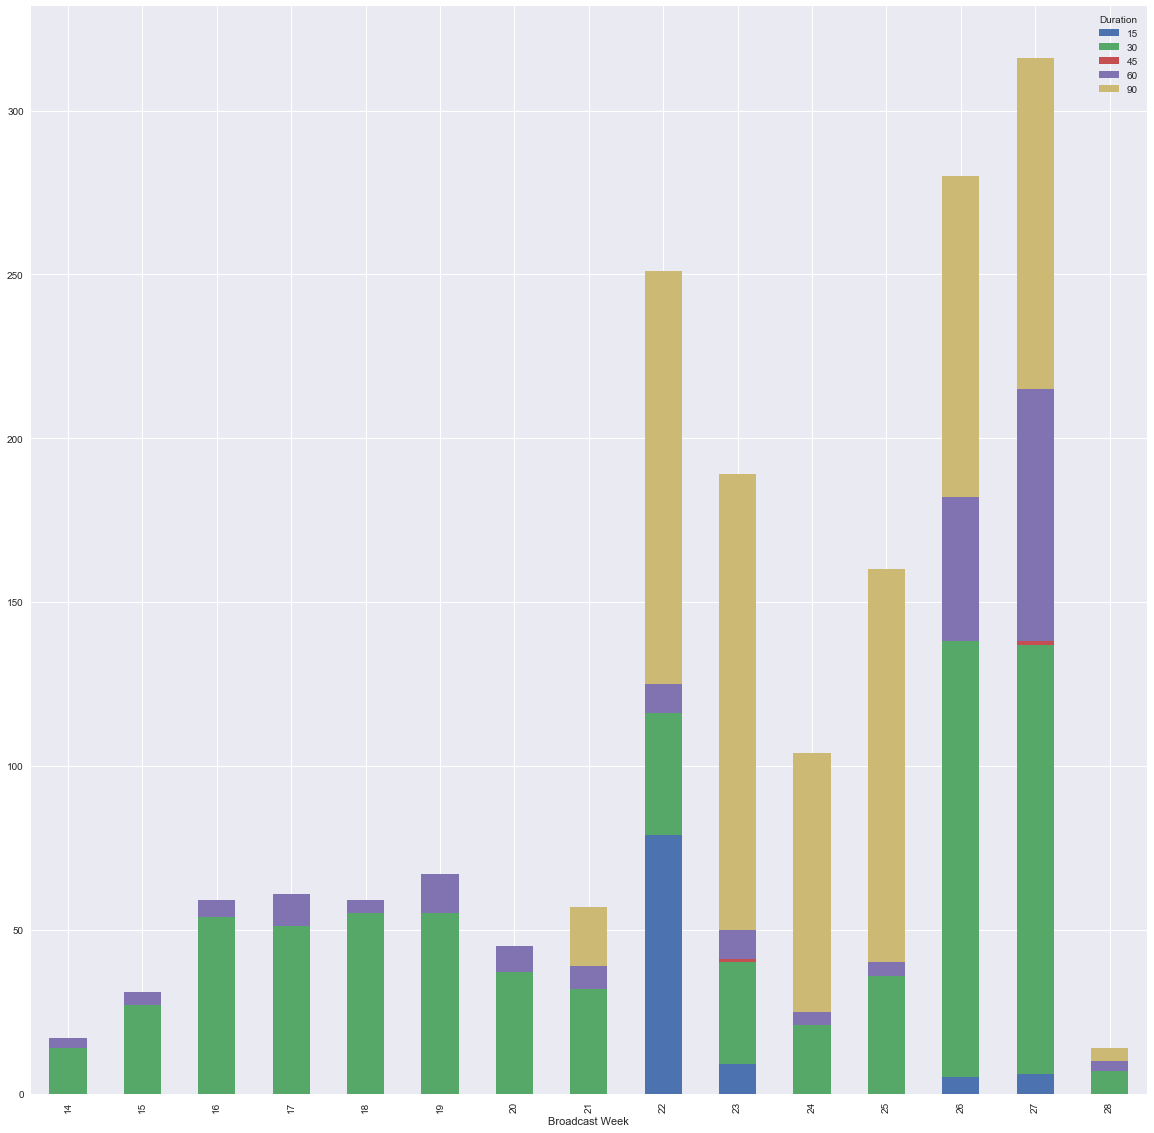

In [19]:
# cross tab of Broadcast Week and Duration
table5 = pd.crosstab(index=df["Broadcast Week"], 
                          columns=df["Duration"])

table5.plot(kind="bar", 
                 figsize=(20,20),
                 stacked=True)
# Observations
# in the starting weeks till 21, the majority commercials were 30 second duration
# from week 22 to 25, a significnat portion were 90 seconds
# weeks 26 and 27, 30 seconds commercials are back

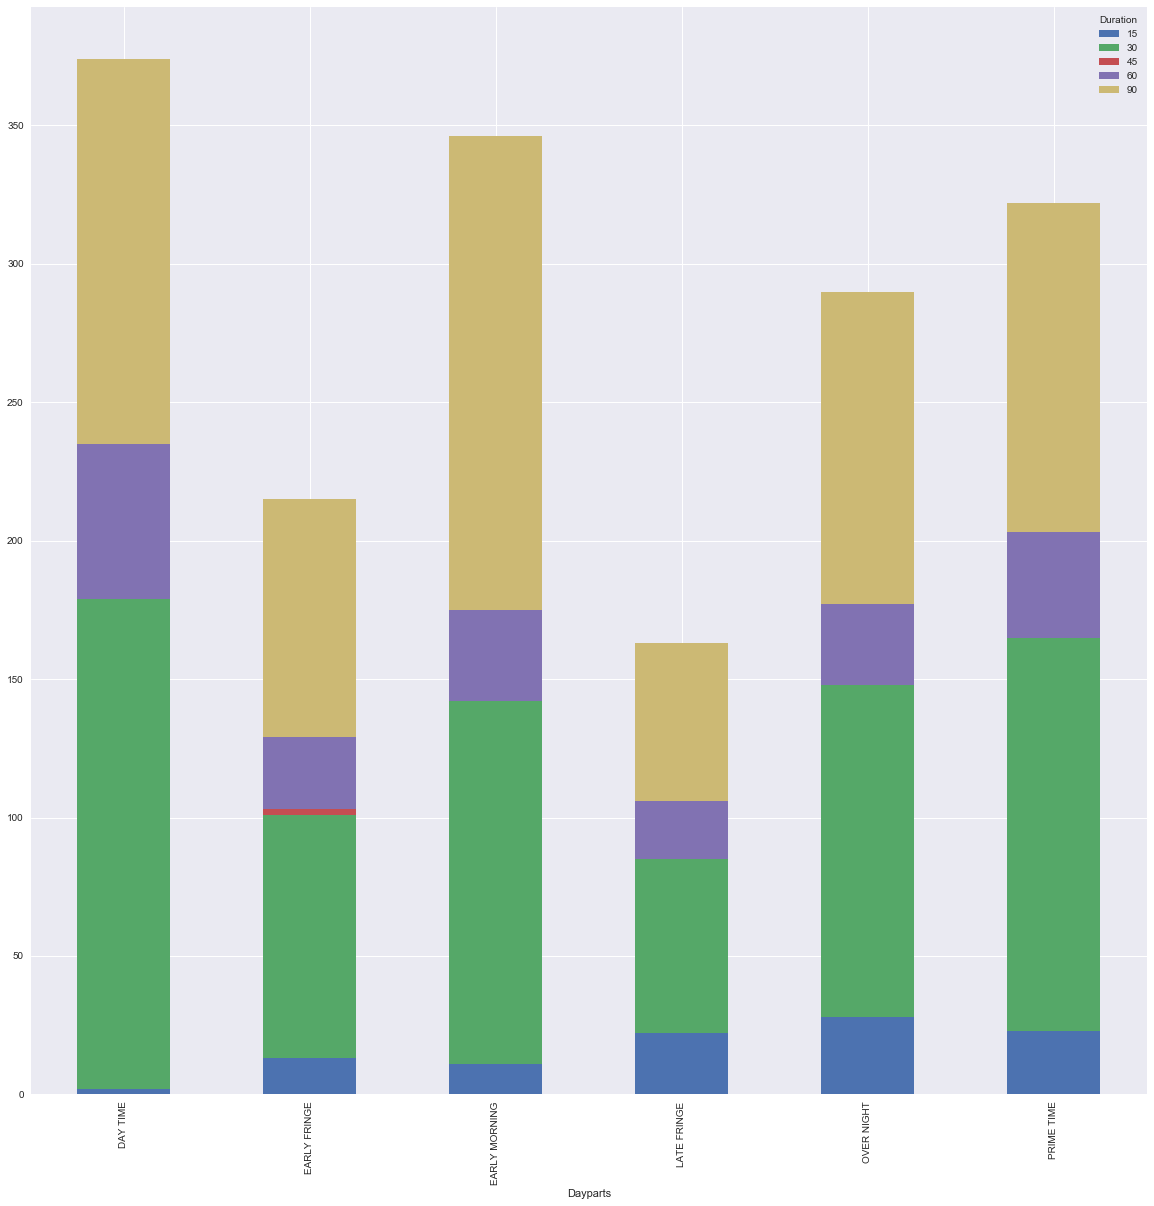

In [18]:
# cross tab of Dayparts and Duration
table6 = pd.crosstab(index=df["Dayparts"], 
                          columns=df["Duration"])

table6.plot(kind="bar", 
                 figsize=(20,20),
                 stacked=True)
## Observations
# For day time, the maximum number of commercials are 30 seconds followed by 90 seconds
# For early morning, the commercials are almost evenly spread across 30 and 90 seconds

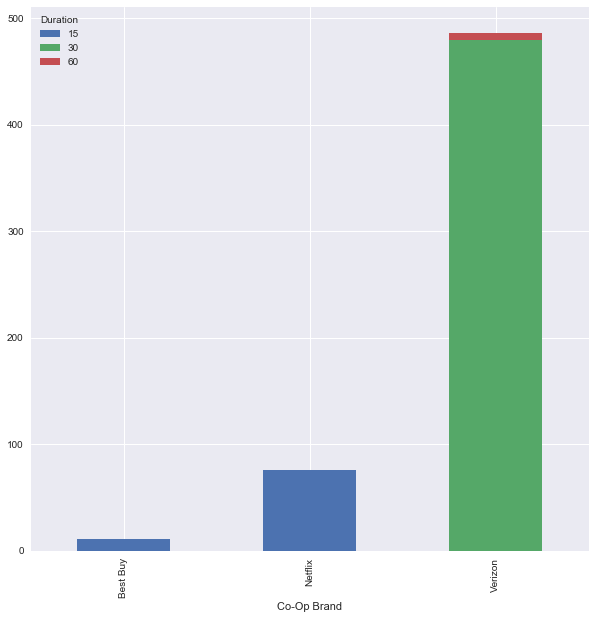

In [17]:
# cross tab of Dayparts and Duration
table7 = pd.crosstab(index=df["Co-Op Brand"], 
                          columns=df["Duration"])

table7.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)
# Observations
# verizon commercials are almost all 30 seconds
# Netflix commercials are 15 seconds
# Best Buy commercials are 15 seconds

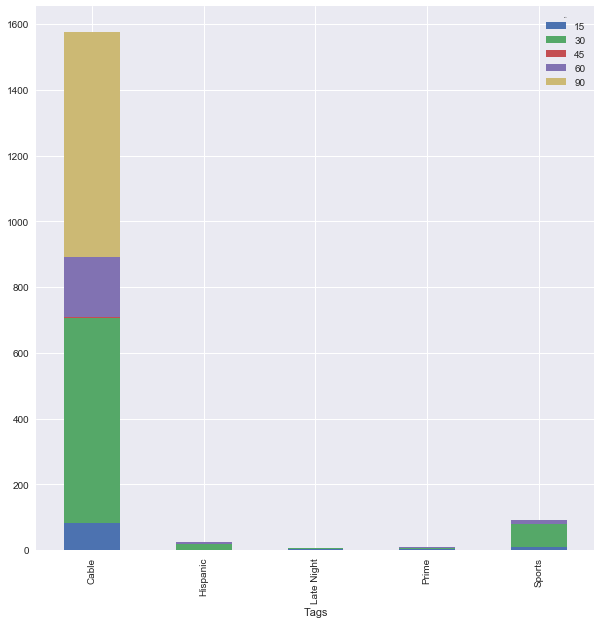

In [25]:
# cross tab of Tags and Duration
table8 = pd.crosstab(index=df["Tags"], 
                          columns=df["Duration"])

table8.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)
# Observations
# For cable the commercials are distributed between 30 and 90 seconds
# For others, its mostly 30 seconds

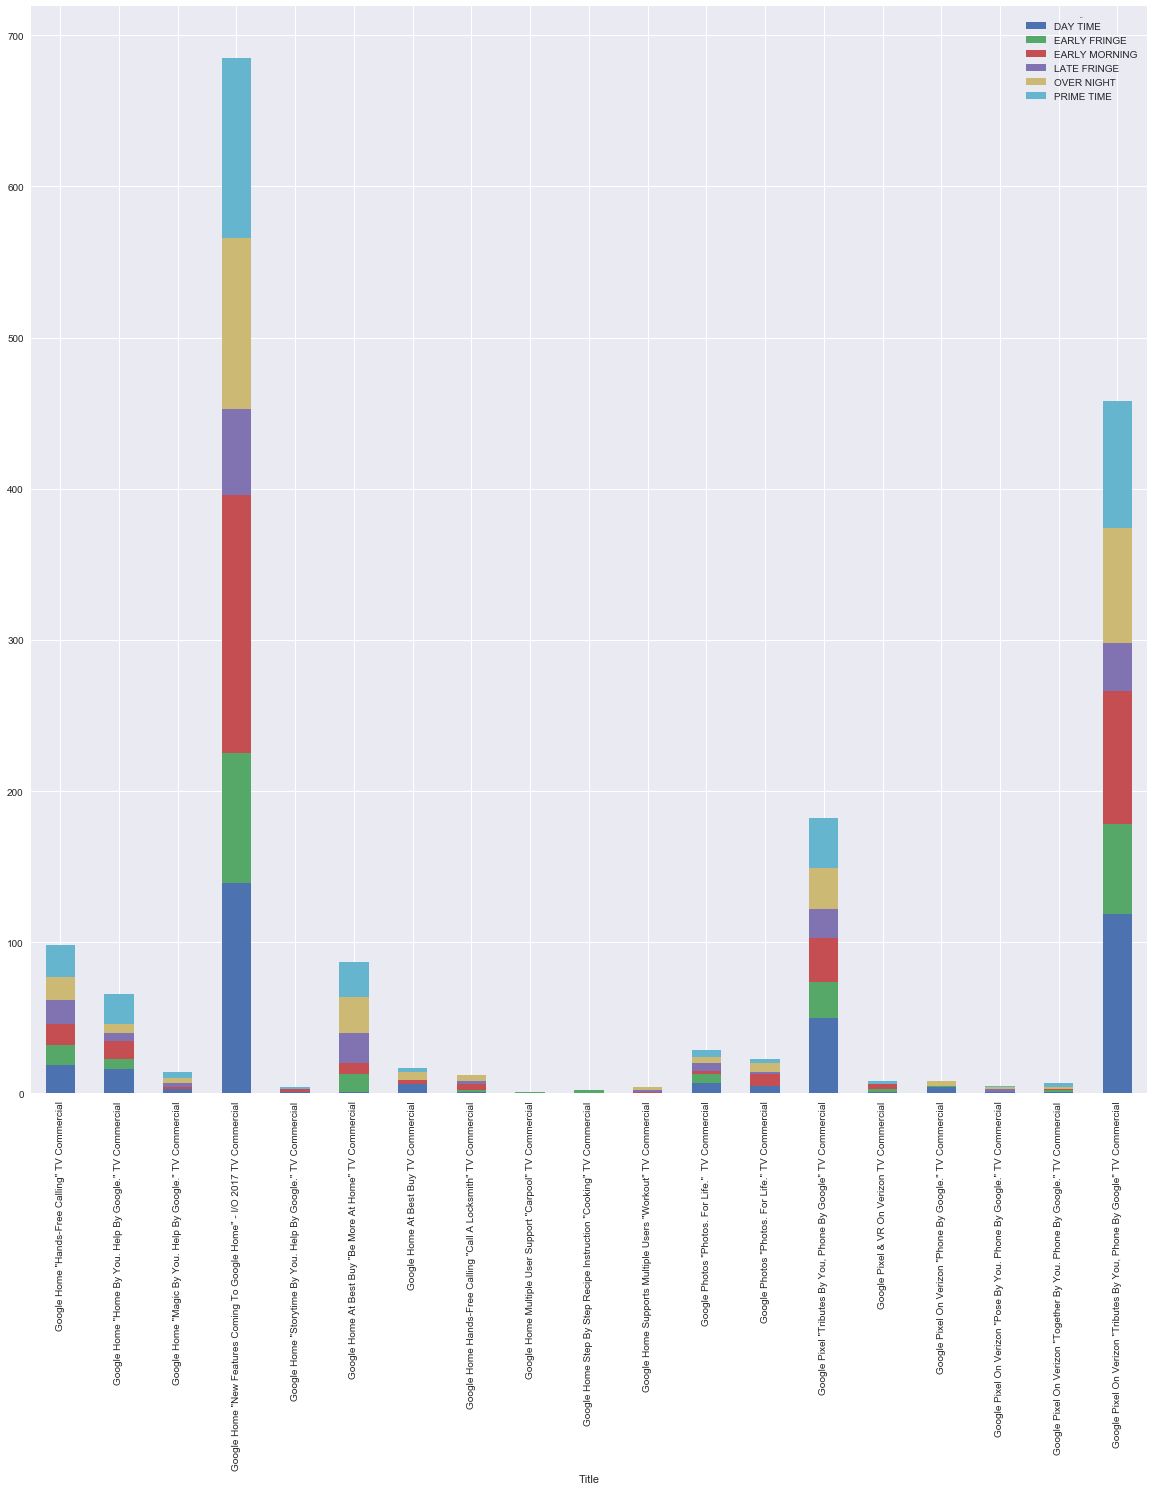

In [27]:
# cross tab of Dayparts and Title
table9 = pd.crosstab(index=df["Title"], 
                          columns=df["Dayparts"])

table9.plot(kind="bar", 
                 figsize=(20,20),
                 stacked=True)

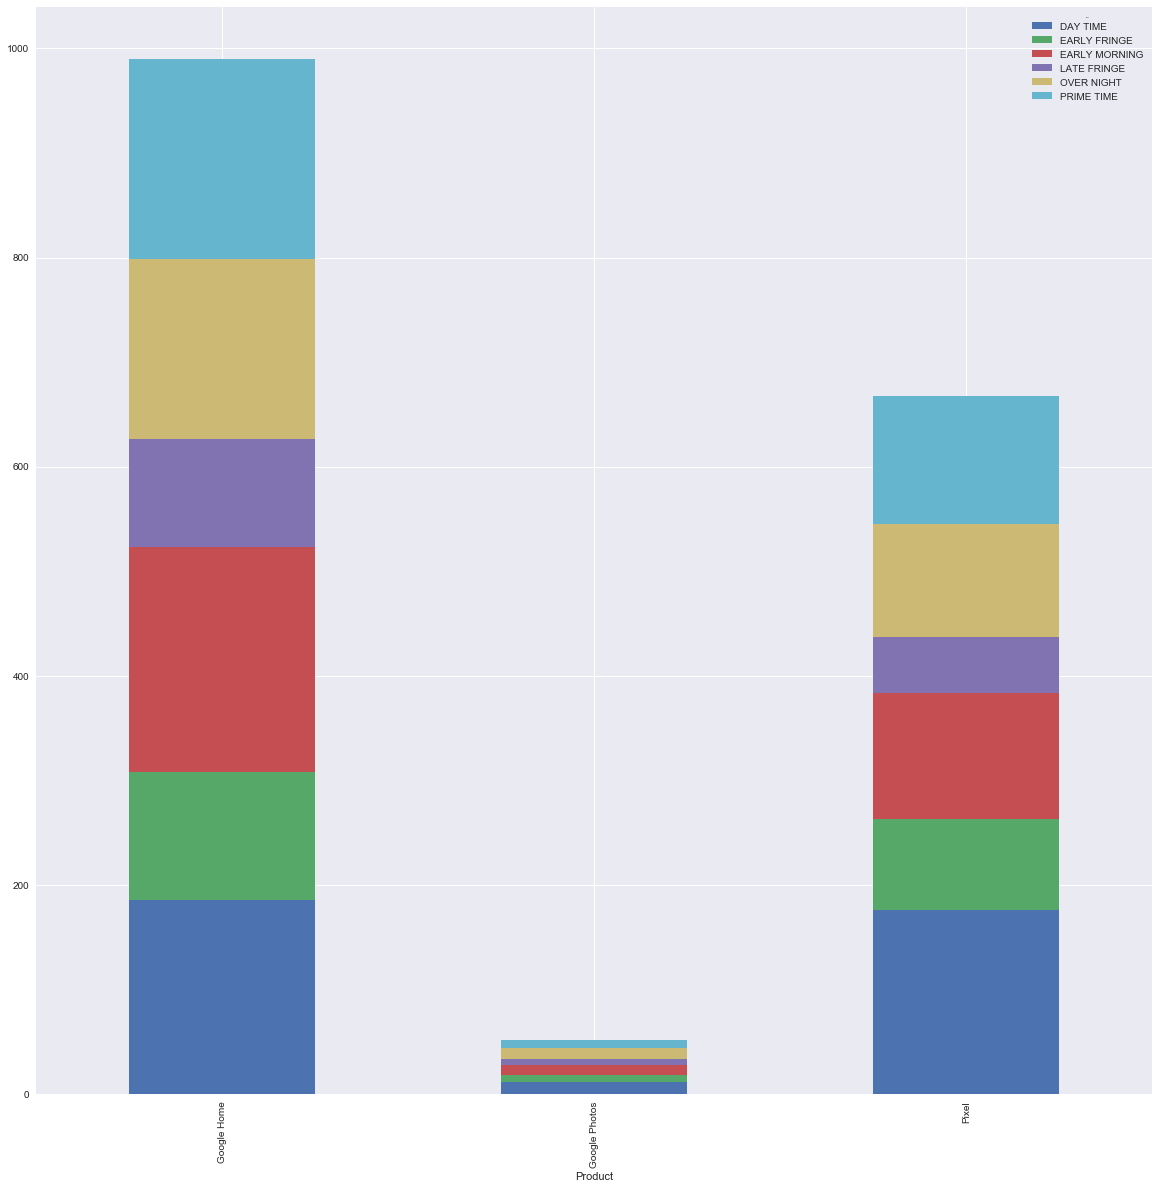

In [29]:
# cross tab of Dayparts and Product
table10 = pd.crosstab(index=df["Product"], 
                          columns=df["Dayparts"])

table10.plot(kind="bar", 
                 figsize=(20,20),
                 stacked=True)

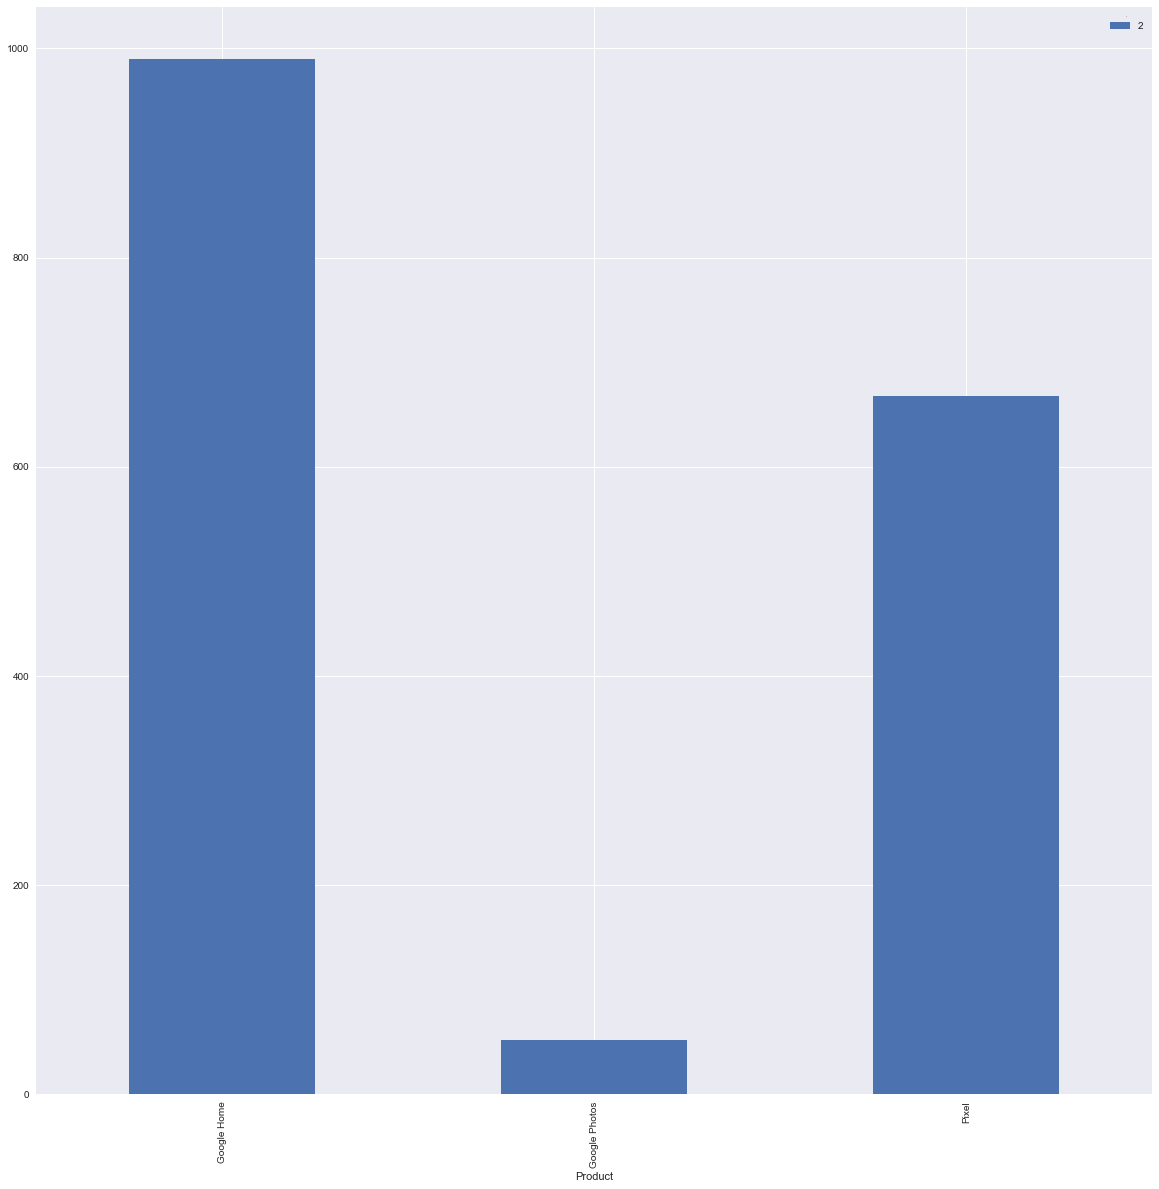

In [56]:
# cross tab of Product and Hour
table11 = pd.crosstab(index=df["Product"], 
                          columns=df["hour"])

table11.plot(kind="bar", 
                 figsize=(20,20),
                 stacked=True)

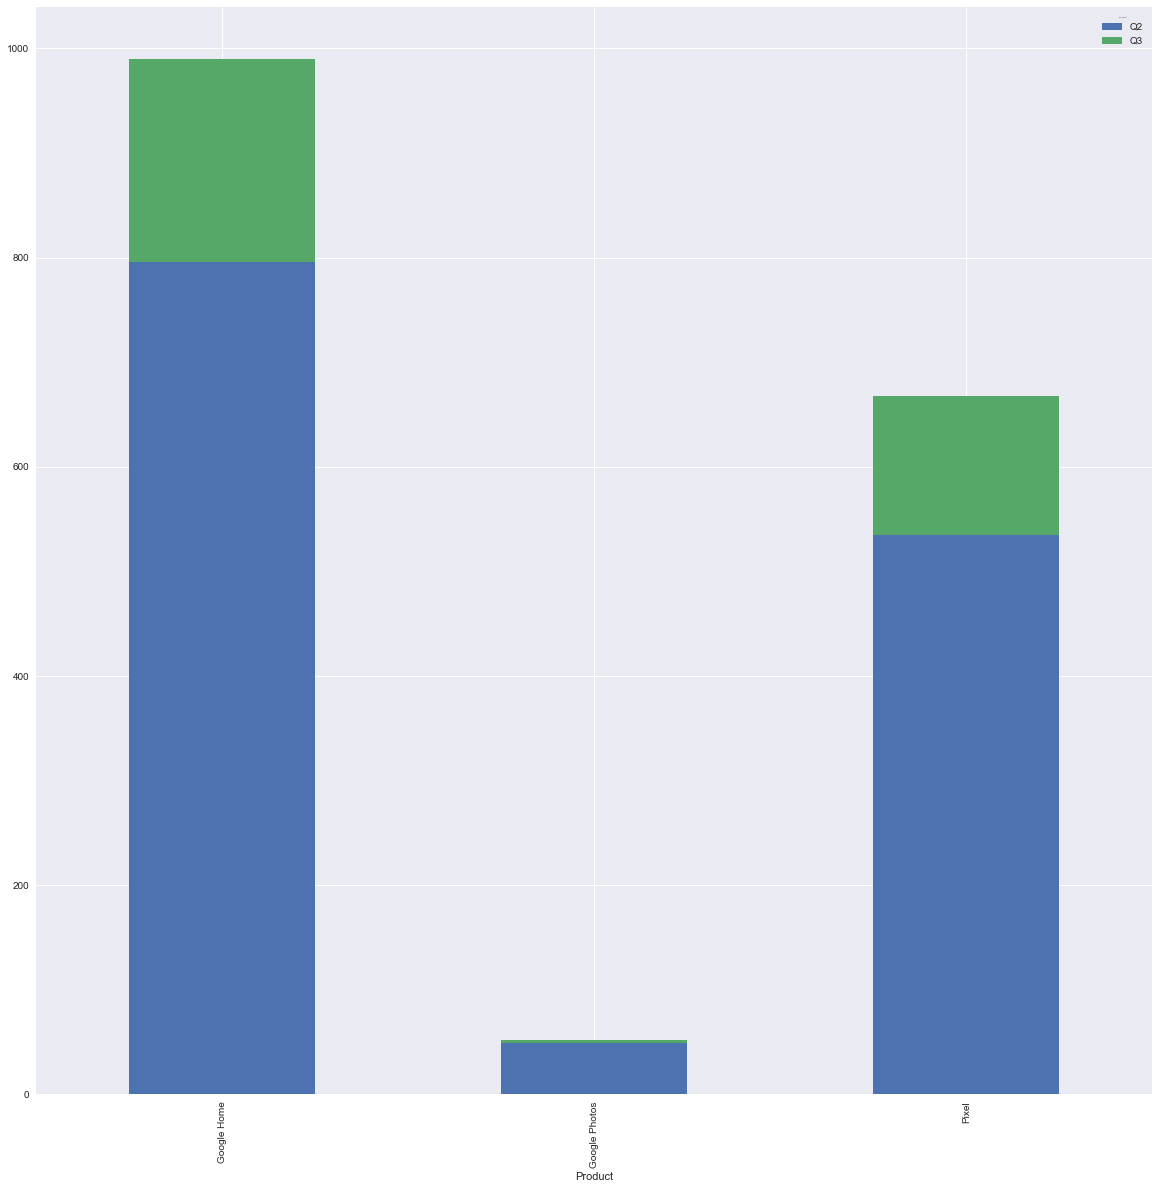

In [33]:
# cross tab of Dayparts and broad cast quarter
table12 = pd.crosstab(index=df["Product"], 
                          columns=df["Broadcast Quarter"])

table12.plot(kind="bar", 
                 figsize=(20,20),
                 stacked=True)
# Observations
# Most commercials are in Q2

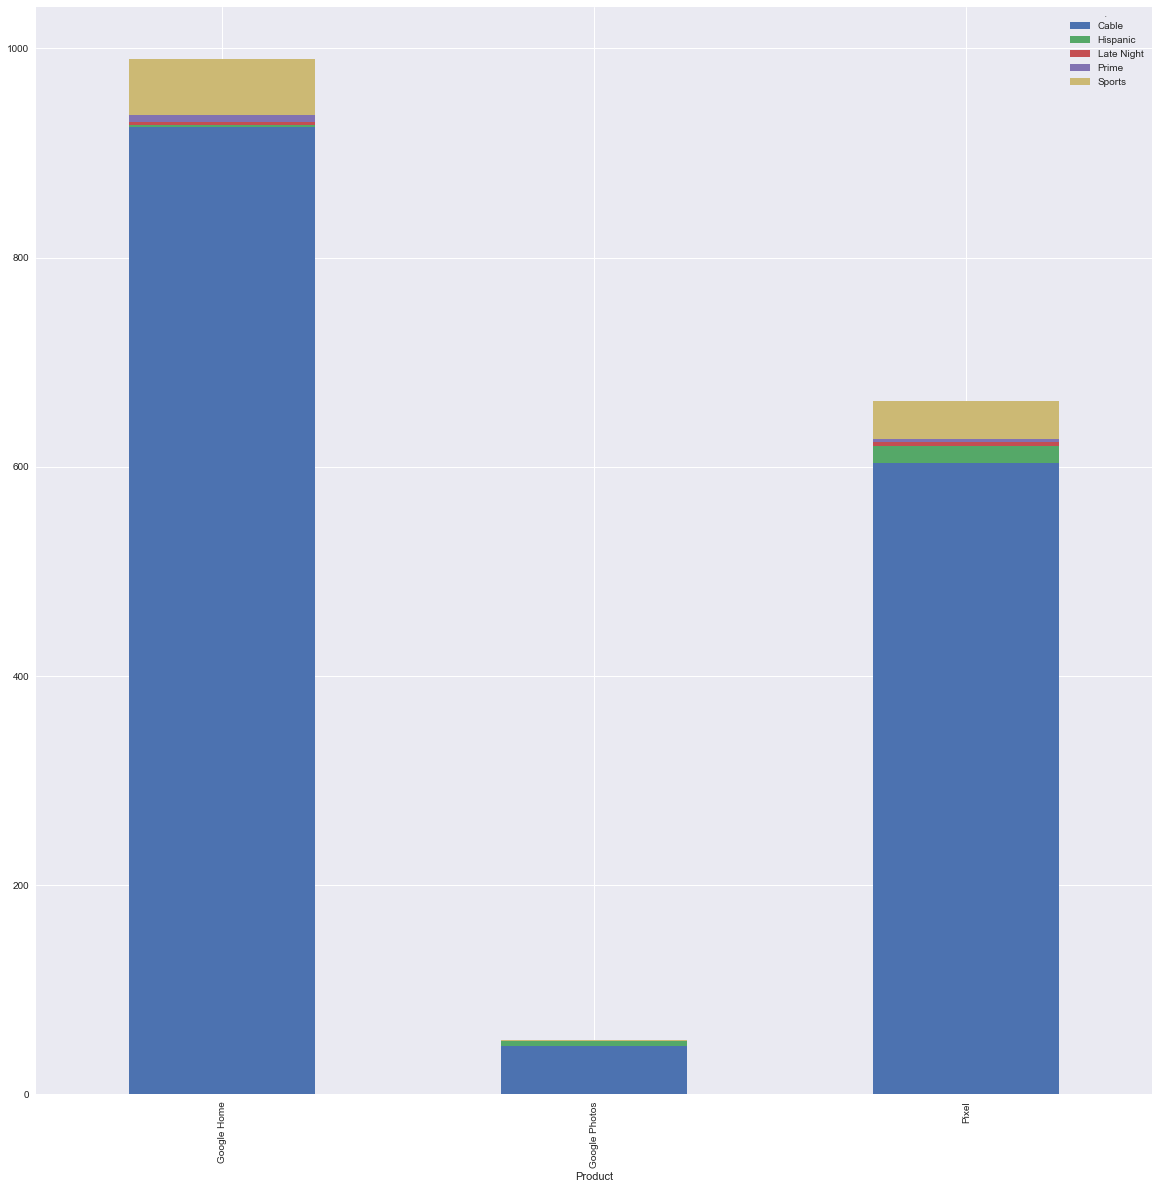

In [35]:
# cross tab of Products and Tags
table13 = pd.crosstab(index=df["Product"], 
                          columns=df["Tags"])

table13.plot(kind="bar", 
                 figsize=(20,20),
                 stacked=True)
# Observations
# most commercials are on cable

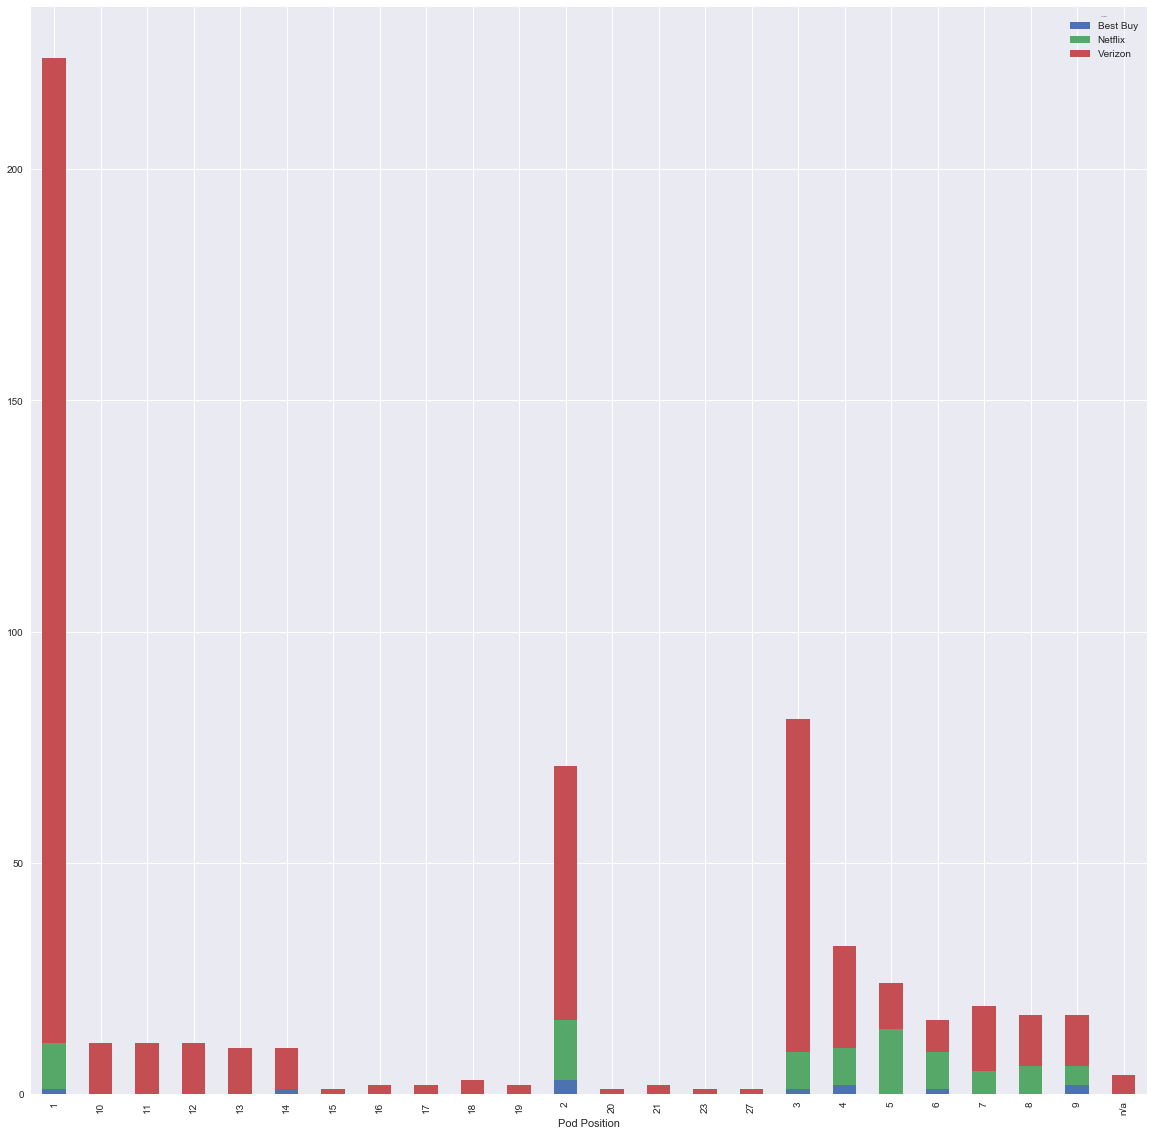

In [38]:
# cross tab of Pod Position and Co-Op Brand
table14 = pd.crosstab(index=df["Pod Position"], 
                          columns=df["Co-Op Brand"])

table14.plot(kind="bar", 
                 figsize=(20,20),
                 stacked=True)
# Observations
# Across Pod position, majority commercials are on Verizon